# Volume Correlation SV
Author: Joel Enrique Díaz Villanueva   
Organisation: Universidad de Monterrey   

---

<a name="python-implementation"></a>
## Python implementation

<a name='required-standard-libraries'></a>
### Required standard libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_key = pd.read_excel('/content/key.xlsx')
df_key

,PHASE,PTID,RID,VISCODE,VISCODE2,IMAGEUID,EXAMDATE,RUNDATE,STATUS,FSVER,...,ST147SV,ST148SV,ST149SV,ST150SV,ST151SV,ST152SV,ST153SV,ST154SV,ST155SV,update_stamp
0,ADNI1,031_S_0830,830,m24,m24,124115,2008-09-25,2024-11-15,partial,7.2.0,...,208502.547015,203830.985954,412333.532969,219142.5,208280.5,427423,46707,561777.532969,933370,2024-12-02 08:27:54
1,ADNI2,006_S_4363,4363,v11,m12,352001,2012-12-14,2022-08-08,partial,7.2.0,...,185543.376436,193573.580121,379116.956557,224001.0,220582.0,444583,47537,518009.956557,910735,2024-12-02 08:27:54
2,ADNI2,128_S_2130,2130,v11,m24,357762,2013-01-23,2022-10-05,partial,7.2.0,...,239542.502215,236423.755132,475966.257347,243608.5,244524.5,488133,52827,624747.257347,1100779,2024-12-02 08:27:54
3,ADNI2,072_S_4462,4462,v11,m12,363365,2013-02-14,2022-08-14,partial,7.2.0,...,213506.008898,219250.995311,432757.004209,235555.5,244794.5,480350,52125,597270.004209,1041063,2024-12-02 08:27:54
4,ADNI2,137_S_0972,972,v11,m72,357731,2012-11-30,2022-10-01,partial,7.2.0,...,193444.767932,201071.736265,394516.504197,206994.0,208707.0,415701,48768,544949.504197,899071,2024-12-02 08:27:54
5,ADNI2,099_S_4157,4157,v11,m12,340545,2012-09-25,2022-08-14,partial,7.2.0,...,178577.941375,175400.423423,353978.364798,189164.5,187911.5,377076,42682,492273.364798,816837,2024-12-02 08:27:54
6,ADNI2,032_S_4823,4823,v11,m12,388428,2013-07-22,2022-09-25,partial,7.2.0,...,196587.119500,191141.854000,387728.973500,190203.5,200277.5,390481,41302,533628.973500,895553,00:27:54
7,ADNI2,130_S_2373,2373,v21,m36,424962,2014-05-12,2022-10-11,partial,7.2.0,...,159716.557143,157629.596426,317346.153569,179704.0,180506.0,360210,39407,432662.153569,743783,2024-12-02 08:27:54
8,ADNI2,041_S_4720,4720,v11,m12,374625,2013-05-17,2022-09-25,partial,7.2.0,...,229640.691294,233271.551629,462912.242922,235736.0,238934.0,474670,56196,613640.242922,1035211,2024-12-02 08:27:54
9,ADNI2,137_S_4623,4623,v11,m12,373201,2013-05-13,2022-10-03,partial,7.2.0,...,216145.839696,218050.687075,434196.526771,229295.0,228576.0,457871,54306,594187.526771,974162,2024-12-02 08:27:54


In [3]:
# Filter only columns ending in "SA" and the "PTID" column
df_filtered = df_key.filter(regex='SV$|^PTID$')

df_filtered = df_filtered.T

df_filtered

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
PTID,031_S_0830,006_S_4363,128_S_2130,072_S_4462,137_S_0972,099_S_4157,032_S_4823,130_S_2373,041_S_4720,137_S_4623,...,114_S_5047,002_S_1268,041_S_4138,037_S_4030,035_S_4582,002_S_4746,022_S_2087,130_S_2403,067_S_2195,137_S_4331
ST101SV,1564.7,1926.3,1810.8,2021.5,1851.7,1752.7,1698.0,1682.5,2053.8,2018.0,...,1792.8,1892.2,1706.4,2081.0,1896.6,2159.1,1753.2,1822.1,2228.2,1792.5
ST112SV,3105.7,3674.5,3974.0,4773.0,3845.3,3866.0,2771.6,3357.6,5188.8,4746.6,...,3529.9,3867.0,3446.5,4764.1,4147.5,4485.4,4811.8,4071.7,4199.5,4435.6
ST11SV,364.3,251.4,493.7,362.1,268.5,271.0,160.0,223.9,371.9,458.3,...,389.7,47.6,270.7,429.4,301.8,354.6,345.0,274.0,478.9,340.3
ST120SV,6419.9,5951.1,6829.2,5820.9,6283.0,4689.9,4826.5,4454.3,6979.5,6687.5,...,6468.6,5666.5,5040.6,6007.0,5962.1,7084.9,6949.5,6444.6,6374.5,6236.3
ST124SV,3240.5,3082.4,4021.0,4287.7,3467.7,2948.5,2918.4,3216.0,3998.3,3894.1,...,3987.4,3567.4,2808.9,3864.3,3451.8,4210.2,3802.5,3487.6,4362.8,3730.3
ST125SV,NaN,47.2,23.7,76.3,23.4,26.8,NaN,46.7,15.5,11.0,...,54.9,16.8,6.2,39.6,5.0,23.7,19.4,23.6,21.4,121.7
ST127SV,2105.1,1333.5,3240.2,3137.2,2567.5,2005.8,2055.1,1138.1,1452.9,1381.6,...,1450.0,2674.3,2950.5,1774.0,1514.4,2899.5,2024.2,1818.9,2036.2,3125.7
ST128SV,3009.3,1363.5,7519.8,4245.9,3717.1,8494.1,4388.2,1254.4,7873.9,1841.2,...,3725.5,14717.7,18293.6,3467.8,4120.2,8279.6,3823.0,3906.5,2755.1,20849.7
ST12SV,992.1,1201.4,1294.0,1138.4,827.1,930.6,646.1,769.4,1571.1,1286.3,...,1286.5,1050.6,546.6,1213.6,943.2,1375.8,1327.0,980.0,1276.0,1311.0


In [4]:
df_filtered = df_filtered.dropna()

df_filtered

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
PTID,031_S_0830,006_S_4363,128_S_2130,072_S_4462,137_S_0972,099_S_4157,032_S_4823,130_S_2373,041_S_4720,137_S_4623,...,114_S_5047,002_S_1268,041_S_4138,037_S_4030,035_S_4582,002_S_4746,022_S_2087,130_S_2403,067_S_2195,137_S_4331
ST101SV,1564.7,1926.3,1810.8,2021.5,1851.7,1752.7,1698.0,1682.5,2053.8,2018.0,...,1792.8,1892.2,1706.4,2081.0,1896.6,2159.1,1753.2,1822.1,2228.2,1792.5
ST112SV,3105.7,3674.5,3974.0,4773.0,3845.3,3866.0,2771.6,3357.6,5188.8,4746.6,...,3529.9,3867.0,3446.5,4764.1,4147.5,4485.4,4811.8,4071.7,4199.5,4435.6
ST11SV,364.3,251.4,493.7,362.1,268.5,271.0,160.0,223.9,371.9,458.3,...,389.7,47.6,270.7,429.4,301.8,354.6,345.0,274.0,478.9,340.3
ST120SV,6419.9,5951.1,6829.2,5820.9,6283.0,4689.9,4826.5,4454.3,6979.5,6687.5,...,6468.6,5666.5,5040.6,6007.0,5962.1,7084.9,6949.5,6444.6,6374.5,6236.3
ST124SV,3240.5,3082.4,4021.0,4287.7,3467.7,2948.5,2918.4,3216.0,3998.3,3894.1,...,3987.4,3567.4,2808.9,3864.3,3451.8,4210.2,3802.5,3487.6,4362.8,3730.3
ST127SV,2105.1,1333.5,3240.2,3137.2,2567.5,2005.8,2055.1,1138.1,1452.9,1381.6,...,1450.0,2674.3,2950.5,1774.0,1514.4,2899.5,2024.2,1818.9,2036.2,3125.7
ST128SV,3009.3,1363.5,7519.8,4245.9,3717.1,8494.1,4388.2,1254.4,7873.9,1841.2,...,3725.5,14717.7,18293.6,3467.8,4120.2,8279.6,3823.0,3906.5,2755.1,20849.7
ST12SV,992.1,1201.4,1294.0,1138.4,827.1,930.6,646.1,769.4,1571.1,1286.3,...,1286.5,1050.6,546.6,1213.6,943.2,1375.8,1327.0,980.0,1276.0,1311.0
ST16SV,3461.6,2846.7,3791.1,3183.0,3392.4,3344.5,2756.5,2795.4,3353.5,3086.4,...,3210.3,4899.9,3159.5,3533.4,2809.3,3603.7,2894.3,3247.0,3452.4,4430.7


Add new patients from the ADNI database (Freesurfer 7.4.1)

ST101SV N mm3 Volume (WM Parcellation) of RightPallidum

ST112SV N mm3 Volume (WM Parcellation) of RightPutamen

ST11SV N mm3 Volume (WM Parcellation) of LeftAccumbensArea

ST120SV N mm3 Volume (WM Parcellation) of RightThalamus

ST124SV N mm3 Volume (WM Parcellation) of RightVentralDC

ST127SV N mm3 Volume (WM Parcellation) of ThirdVentricle

ST128SV N mm3 Volume (WM Parcellation) of WMHypoIntensities

ST12SV N mm3 Volume (WM Parcellation) of LeftAmygdala

ST16SV N mm3 Volume (WM Parcellation) of LeftCaudate

ST17SV N mm3 Volume (WM Parcellation) of LeftCerebellumCortex

ST18SV N mm3 Volume (WM Parcellation) of LeftCerebellumWM

ST1SV N mm3 Volume (WM Parcellation) of Brainstem

ST21SV N mm3 Volume (WM Parcellation) of LeftChoroidPlexus

ST29SV N mm3 Volume (WM Parcellation) of LeftHippocampus

ST2SV N mm3 Volume (WM Parcellation) of CorpusCallosumAnterior

ST30SV N mm3 Volume (WM Parcellation) of LeftInferiorLateralVentricle

ST37SV N mm3 Volume (WM Parcellation) of LeftLateralVentricle

ST3SV N mm3 Volume (WM Parcellation) of CorpusCallosumCentral

ST42SV N mm3 Volume (WM Parcellation) of LeftPallidum

ST4SV N mm3 Volume (WM Parcellation) of CorpusCallosumMidAnterior

ST53SV N mm3 Volume (WM Parcellation) of LeftPutamen

ST5SV N mm3 Volume (WM Parcellation) of CorpusCallosumMidPosterior

ST61SV N mm3 Volume (WM Parcellation) of LeftThalamus

ST65SV N mm3 Volume (WM Parcellation) of LeftVentralDC

ST69SV N mm3 Volume (WM Parcellation) of OpticChiasm

ST6SV N mm3 Volume (WM Parcellation) of CorpusCallosumPosterior

ST70SV N mm3 Volume (WM Parcellation) of RightAccumbensArea

ST71SV N mm3 Volume (WM Parcellation) of RightAmygdala

ST75SV N mm3 Volume (WM Parcellation) of RightCaudate

ST76SV N mm3 Volume (WM Parcellation) of RightCerebellumCortex

ST77SV N mm3 Volume (WM Parcellation) of RightCerebellumWM

ST7SV N mm3 Volume (WM Parcellation) of Csf

ST80SV N mm3 Volume (WM Parcellation) of RightChoroidPlexus

ST88SV N mm3 Volume (WM Parcellation) of RightHippocampus

ST89SV N mm3 Volume (WM Parcellation) of RightInferiorLateralVentricle

ST96SV N mm3 Volume (WM Parcellation) of RightLateralVentricle

ST9SV N mm3 Volume (WM Parcellation) of FourthVentricle

ST147SV N mm3 Subcortical Volume (aseg.stats) of LeftCorticalGM

ST148SV N mm3 Subcortical Volume (aseg.stats) of RightCorticalGM

ST149SV N mm3 Subcortical Volume (aseg.stats) of CorticalGM

ST150SV N mm3 Subcortical Volume (aseg.stats) of LeftCorticalWM

ST151SV N mm3 Subcortical Volume (aseg.stats) of RightCorticalWM

ST152SV N mm3 Subcortical Volume (aseg.stats) of CorticalWM

ST153SV N mm3 Subcortical Volume (aseg.stats) of SubcorticalGM

ST154SV N mm3 Subcortical Volume (aseg.stats) of TotalGM

ST155SV N mm3 Subcortical Volume (aseg.stats) of SupraTentorial

In [5]:
df_filtered = df_filtered.copy()

df_filtered.rename(index={
    'ST101SV': 'Right-Pallidum',
    'ST112SV': 'Right-Putamen',
    'ST11SV': 'Left-Accumbens-area',
    'ST120SV': 'Right-Thalamus',
    'ST124SV': 'Right-VentralDC',
    'ST127SV': '3rd-Ventricle',
    'ST128SV': 'WM-hypointensities',
    'ST12SV': 'Left-Amygdala',
    'ST16SV': 'Left-Caudate',
    'ST17SV': 'Left-Cerebellum-Cortex',
    'ST18SV': 'Left-Cerebellum-White-Matter',
    'ST1SV': 'Brain-Stem',
    'ST21SV': 'Left-choroid-plexus',
    'ST29SV': 'Left-Hippocampus',
    'ST2SV': 'CC_Anterior',
    'ST30SV': 'Left-Inf-Lat-Vent',
    'ST37SV': 'Left-Lateral-Ventricle',
    'ST3SV': 'CC_Central',
    'ST42SV': 'Left-Pallidum',
    'ST4SV': 'CC_Mid_Anterior',
    'ST53SV': 'Left-Putamen',
    'ST5SV': 'CC_Mid_Posterior',
    'ST61SV': 'Left-Thalamus',
    'ST65SV': 'Left-VentralDC',
    'ST69SV': 'Optic-Chiasm',
    'ST6SV': 'CC_Posterior',
    'ST70SV': 'Right-Accumbens-area',
    'ST71SV': 'Right-Amygdala',
    'ST75SV': 'Right-Caudate',
    'ST76SV': 'Right-Cerebellum-Cortex',
    'ST77SV': 'Right-Cerebellum-White-Matter',
    'ST7SV': 'CSF',
    'ST80SV': 'Right-choroid-plexus',
    'ST88SV': 'Right-Hippocampus',
    'ST89SV': 'Right-Inf-Lat-Vent',
    'ST96SV': 'Right-Lateral-Ventricle',
    'ST9SV': '4th-Ventricle'
}, inplace=True)



df_filtered = df_filtered.drop(index='ST147SV')
df_filtered = df_filtered.drop(index='ST148SV')
df_filtered = df_filtered.drop(index='ST149SV')
df_filtered = df_filtered.drop(index='ST150SV')
df_filtered = df_filtered.drop(index='ST151SV')
df_filtered = df_filtered.drop(index='ST152SV')
df_filtered = df_filtered.drop(index='ST153SV')
df_filtered = df_filtered.drop(index='ST154SV')
df_filtered = df_filtered.drop(index='ST155SV')


df_filtered = df_filtered.T

df_filtered

,PTID,Right-Pallidum,Right-Putamen,Left-Accumbens-area,Right-Thalamus,Right-VentralDC,3rd-Ventricle,WM-hypointensities,Left-Amygdala,Left-Caudate,...,Right-Amygdala,Right-Caudate,Right-Cerebellum-Cortex,Right-Cerebellum-White-Matter,CSF,Right-choroid-plexus,Right-Hippocampus,Right-Inf-Lat-Vent,Right-Lateral-Ventricle,4th-Ventricle
0,031_S_0830,1564.7,3105.7,364.3,6419.9,3240.5,2105.1,3009.3,992.1,3461.6,...,1121.5,3508.9,50420.0,11446.2,1164.1,918.6,2995.1,2209.5,15818.4,1490.7
1,006_S_4363,1926.3,3674.5,251.4,5951.1,3082.4,1333.5,1363.5,1201.4,2846.7,...,1313.9,3337.9,45853.7,13349.2,1070.2,557.7,3667.4,327.6,14349.9,1672.4
2,128_S_2130,1810.8,3974.0,493.7,6829.2,4021.0,3240.2,7519.8,1294.0,3791.1,...,1328.1,4158.7,48712.2,12274.7,2942.5,701.0,2994.2,1340.2,30649.0,2628.9
3,072_S_4462,2021.5,4773.0,362.1,5820.9,4287.7,3137.2,4245.9,1138.4,3183.0,...,1531.5,3419.9,56996.2,14523.8,1681.6,1032.8,3669.2,1423.4,32130.7,1709.9
4,137_S_0972,1851.7,3845.3,268.5,6283.0,3467.7,2567.5,3717.1,827.1,3392.4,...,1375.9,3483.6,50608.5,11772.9,1286.5,812.8,3899.4,787.2,13348.8,2308.2
5,099_S_4157,1752.7,3866.0,271.0,4689.9,2948.5,2005.8,8494.1,930.6,3344.5,...,941.9,3486.0,47240.1,11811.4,1339.9,860.2,2390.4,1341.0,16995.6,1420.3
6,032_S_4823,1698.0,2771.6,160.0,4826.5,2918.4,2055.1,4388.2,646.1,2756.5,...,922.8,2866.5,53509.9,13480.7,1555.1,1246.5,2710.9,2625.5,35342.8,1700.6
7,130_S_2373,1682.5,3357.6,223.9,4454.3,3216.0,1138.1,1254.4,769.4,2795.4,...,810.7,2790.1,37772.0,11593.2,923.2,710.6,2266.3,688.3,10187.5,987.4
8,041_S_4720,2053.8,5188.8,371.9,6979.5,3998.3,1452.9,7873.9,1571.1,3353.5,...,1551.2,3492.9,47276.8,13726.4,1253.7,1204.1,3484.7,446.2,17851.7,1637.7
9,137_S_4623,2018.0,4746.6,458.3,6687.5,3894.1,1381.6,1841.2,1286.3,3086.4,...,1351.4,3231.0,51549.2,18334.4,1338.3,504.8,4200.4,382.1,9443.4,1454.5


In [6]:
df = pd.read_csv('/content/011_S_4893_features.csv')
df = df[['StructName', 'original_shape_VoxelVolume']]

df

,StructName,original_shape_VoxelVolume
0,Left-Cerebral-White-Matter,181188.0
1,Left-Lateral-Ventricle,11050.0
2,Left-Inf-Lat-Vent,387.0
3,Left-Cerebellum-White-Matter,12946.0
4,Left-Cerebellum-Cortex,45263.0
...,...,...
104,ctx-rh-supramarginal,8124.0
105,ctx-rh-frontalpole,1062.0
106,ctx-rh-temporalpole,2203.0
107,ctx-rh-transversetemporal,735.0


###original_shape_VoxelVolume

In [7]:
csv_files = [
    '/content/031_S_0830_features.csv',
    '/content/006_S_4363_features.csv',
    '/content/128_S_2130_features.csv',
    '/content/072_S_4462_features.csv',
    '/content/137_S_0972_features.csv',
    '/content/099_S_4157_features.csv',
    '/content/032_S_4823_features.csv',
    '/content/130_S_2373_features.csv',
    '/content/041_S_4720_features.csv',
    '/content/137_S_4623_features.csv',
    '/content/013_S_1186_features.csv',
    '/content/002_S_4521_features.csv',
    '/content/137_S_4631_features.csv',
    '/content/036_S_4714_features.csv',
    '/content/035_S_4114_features.csv',
    '/content/141_S_2210_features.csv',
    '/content/041_S_4143_features.csv',
    '/content/011_S_4893_features.csv',
    '/content/114_S_5047_features.csv',
    '/content/002_S_1268_features.csv',
    '/content/041_S_4138_features.csv',
    '/content/037_S_4030_features.csv',
    '/content/035_S_4582_features.csv',
    '/content/002_S_4746_features.csv',
    '/content/022_S_2087_features.csv',
    '/content/130_S_2403_features.csv',
    '/content/067_S_2195_features.csv',
    '/content/137_S_4331_features.csv',
    # Add more patients here
]

df_final = None

for file in csv_files:
    df = pd.read_csv(file, usecols=['StructName', 'original_shape_VoxelVolume'])

    df.set_index('StructName', inplace=True)

    column_name = file.split('/')[-1].replace('_features.csv', '')
    df.columns = [column_name]

    if df_final is None:
        df_final = df
    else:
        df_final = df_final.join(df, how='outer')

df_final = df_final.T
df_final

StructName,3rd-Ventricle,4th-Ventricle,Brain-Stem,CC_Anterior,CC_Central,CC_Mid_Anterior,CC_Mid_Posterior,CC_Posterior,CSF,Left-Accumbens-area,...,ctx-rh-precentral,ctx-rh-precuneus,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-temporalpole,ctx-rh-transversetemporal
031_S_0830,2009.0,1199.0,19716.0,989.0,607.0,604.0,578.0,1330.0,1097.0,288.0,...,11308.0,9175.0,1197.0,14251.0,17666.0,11776.0,9463.0,9316.0,679.0,725.0
006_S_4363,1318.0,1270.0,19228.0,1061.0,517.0,521.0,518.0,1347.0,1121.0,273.0,...,10697.0,7095.0,1285.0,12625.0,15875.0,11313.0,9493.0,8654.0,2372.0,704.0
128_S_2130,3931.0,3013.0,24009.0,658.0,399.0,373.0,476.0,843.0,2005.0,489.0,...,13551.0,9466.0,2770.0,14902.0,22844.0,12088.0,8555.0,9619.0,2823.0,738.0
072_S_4462,2837.0,1726.0,21523.0,925.0,463.0,423.0,326.0,1147.0,1994.0,381.0,...,11517.0,9477.0,1536.0,14526.0,18203.0,11810.0,12123.0,10324.0,2324.0,765.0
137_S_0972,2388.0,2284.0,20641.0,840.0,511.0,426.0,537.0,949.0,1392.0,248.0,...,11173.0,8722.0,1649.0,13804.0,17640.0,10860.0,11114.0,8816.0,2558.0,965.0
099_S_4157,1852.0,1315.0,18124.0,853.0,382.0,358.0,457.0,1122.0,1351.0,225.0,...,9954.0,6939.0,1282.0,10436.0,16894.0,8861.0,9918.0,8478.0,1913.0,837.0
032_S_4823,2058.0,1294.0,16930.0,687.0,375.0,315.0,465.0,1060.0,1683.0,302.0,...,11176.0,8581.0,1988.0,12546.0,17592.0,10473.0,7320.0,6804.0,1356.0,660.0
130_S_2373,1145.0,825.0,17438.0,782.0,417.0,421.0,456.0,836.0,828.0,280.0,...,8717.0,6093.0,991.0,9096.0,14183.0,7909.0,7672.0,6187.0,2591.0,565.0
041_S_4720,1324.0,1710.0,22437.0,1070.0,461.0,496.0,564.0,1049.0,1236.0,355.0,...,14303.0,8768.0,1789.0,13301.0,20501.0,11715.0,11181.0,11186.0,2641.0,774.0
137_S_4623,1329.0,1202.0,20828.0,940.0,457.0,500.0,521.0,971.0,1430.0,417.0,...,12883.0,10233.0,1373.0,12675.0,19900.0,13575.0,11587.0,10520.0,2158.0,1000.0


In [8]:
df_final_filtered = df_final[df_filtered.columns.intersection(df_final.columns)]

df_final_filtered

StructName,Right-Pallidum,Right-Putamen,Left-Accumbens-area,Right-Thalamus,Right-VentralDC,3rd-Ventricle,WM-hypointensities,Left-Amygdala,Left-Caudate,Left-Cerebellum-Cortex,...,Right-Amygdala,Right-Caudate,Right-Cerebellum-Cortex,Right-Cerebellum-White-Matter,CSF,Right-choroid-plexus,Right-Hippocampus,Right-Inf-Lat-Vent,Right-Lateral-Ventricle,4th-Ventricle
031_S_0830,1880.0,3740.0,288.0,6216.0,3539.0,2009.0,2015.0,801.0,3193.0,51091.0,...,1030.0,3204.0,50553.0,11638.0,1097.0,1036.0,3108.0,2449.0,15038.0,1199.0
006_S_4363,1983.0,4109.0,273.0,5640.0,3381.0,1318.0,1932.0,1176.0,2969.0,43802.0,...,1472.0,2960.0,46505.0,11462.0,1121.0,721.0,4028.0,297.0,14272.0,1270.0
128_S_2130,2228.0,4068.0,489.0,6311.0,4231.0,3931.0,9442.0,1358.0,3701.0,47930.0,...,1660.0,3723.0,48978.0,10977.0,2005.0,1238.0,3210.0,1248.0,30231.0,3013.0
072_S_4462,1892.0,4812.0,381.0,6790.0,4262.0,2837.0,3971.0,1358.0,3340.0,57157.0,...,1600.0,3504.0,58165.0,13300.0,1994.0,770.0,3917.0,1400.0,32483.0,1726.0
137_S_0972,1858.0,4218.0,248.0,6905.0,3716.0,2388.0,3827.0,881.0,3427.0,50637.0,...,1597.0,3510.0,51856.0,10019.0,1392.0,1033.0,4205.0,790.0,13194.0,2284.0
099_S_4157,1826.0,3986.0,225.0,4872.0,3103.0,1852.0,7805.0,1219.0,3223.0,47876.0,...,1078.0,3234.0,49085.0,11893.0,1351.0,1063.0,2679.0,1356.0,16650.0,1315.0
032_S_4823,2133.0,3088.0,302.0,4703.0,3375.0,2058.0,4674.0,984.0,2854.0,51320.0,...,1131.0,2863.0,53434.0,11791.0,1683.0,1404.0,2878.0,2889.0,34810.0,1294.0
130_S_2373,1658.0,3617.0,280.0,4870.0,3382.0,1145.0,1748.0,903.0,2779.0,38060.0,...,1089.0,3077.0,36957.0,10484.0,828.0,920.0,2576.0,781.0,9891.0,825.0
041_S_4720,2165.0,5333.0,355.0,7167.0,4070.0,1324.0,9151.0,1777.0,3370.0,47396.0,...,1629.0,3279.0,49210.0,12265.0,1236.0,1358.0,3684.0,462.0,18333.0,1710.0
137_S_4623,2142.0,4983.0,417.0,7102.0,4047.0,1329.0,1550.0,1401.0,3134.0,55562.0,...,1505.0,3221.0,54333.0,14061.0,1430.0,632.0,4338.0,331.0,9189.0,1202.0



Correlation in Right-Pallidum: 0.5007925184423889


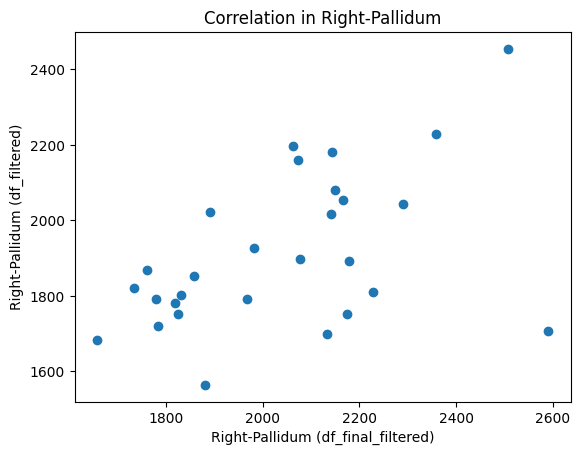


Correlation in Right-Putamen: 0.9216796496345729


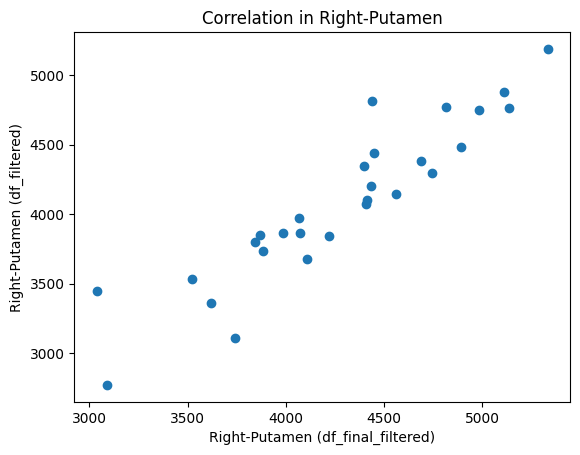


Correlation in Left-Accumbens-area: 0.8115180312552198


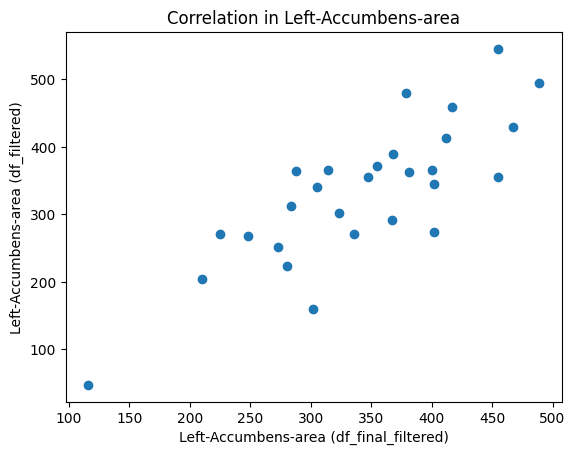


Correlation in Right-Thalamus: 0.8993424299128597


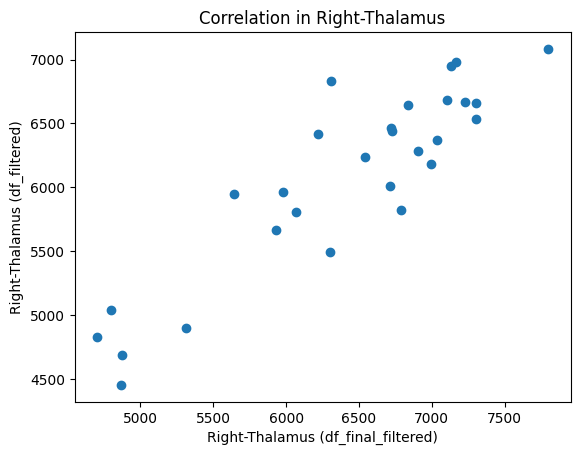


Correlation in Right-VentralDC: 0.9573137209869425


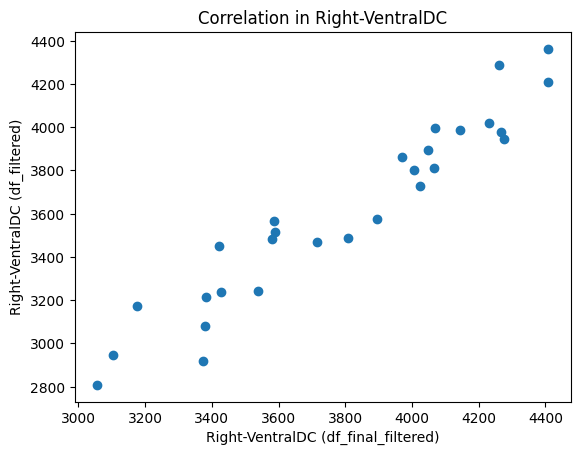


Correlation in 3rd-Ventricle: 0.973135441800992


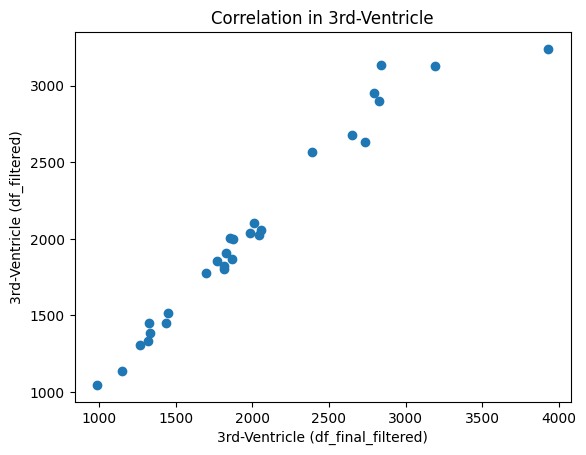


Correlation in WM-hypointensities: 0.9926389475913429


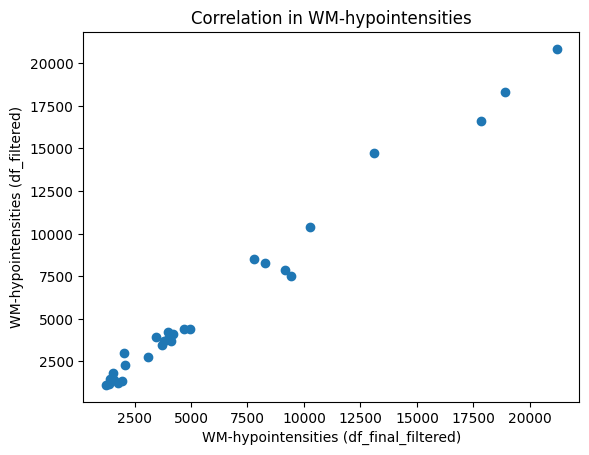


Correlation in Left-Amygdala: 0.913431526030879


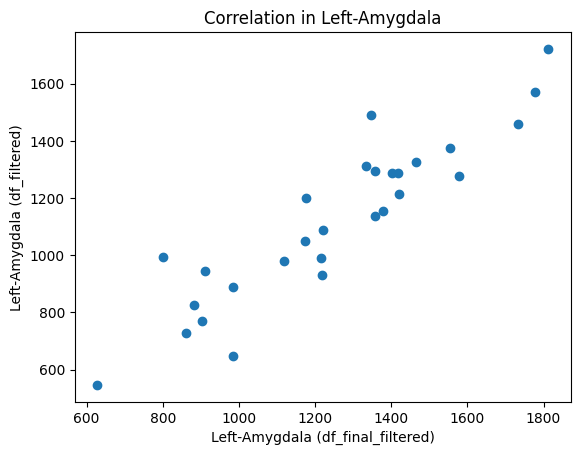


Correlation in Left-Caudate: 0.9540513072293496


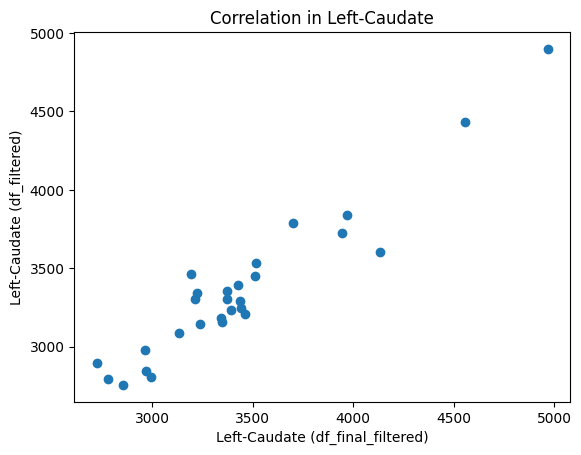


Correlation in Left-Cerebellum-Cortex: 0.9827595130080821


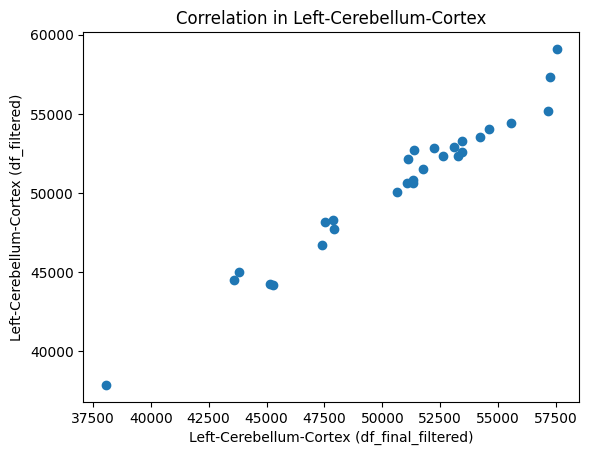


Correlation in Left-Cerebellum-White-Matter: 0.8249199833087336


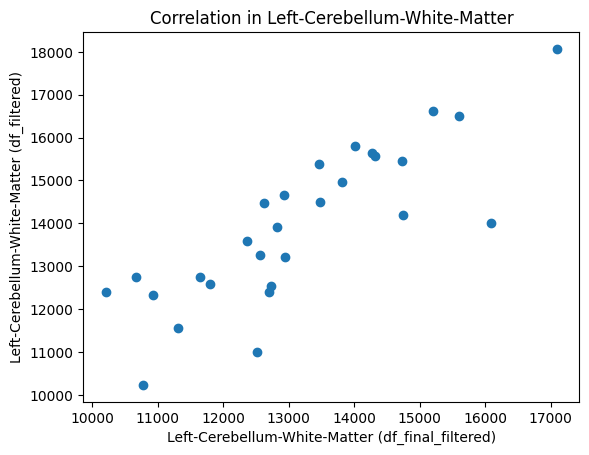


Correlation in Brain-Stem: 0.9453190225083092


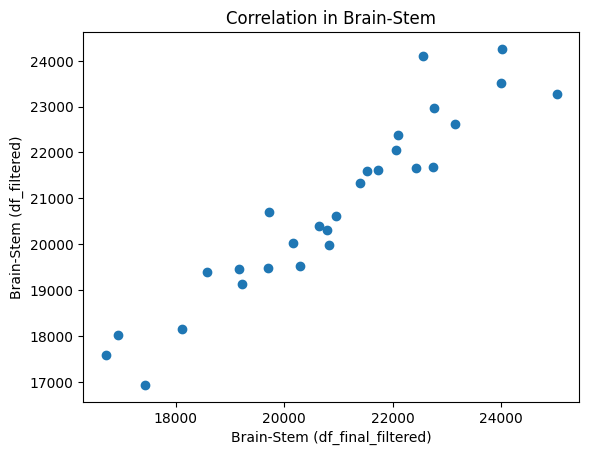


Correlation in Left-choroid-plexus: 0.8462071443527049


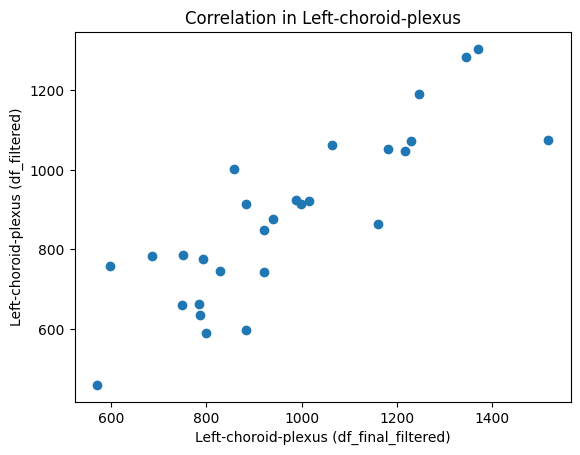


Correlation in Left-Hippocampus: 0.9638560281402929


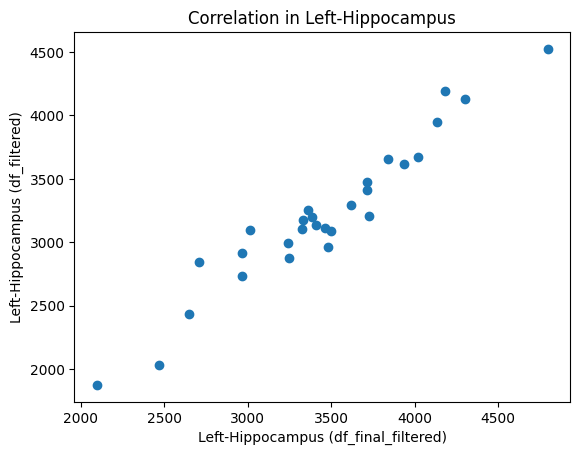


Correlation in CC_Anterior: 0.9389548878513486


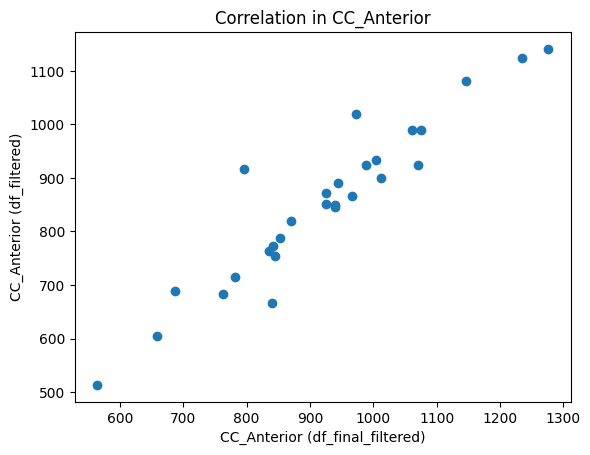


Correlation in Left-Inf-Lat-Vent: 0.9884207112576011


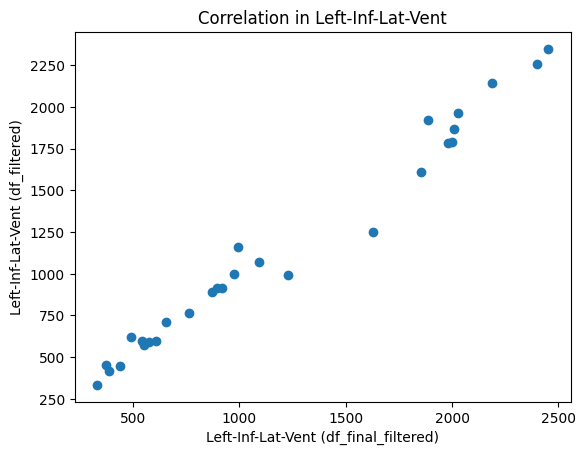


Correlation in Left-Lateral-Ventricle: 0.9992396932708636


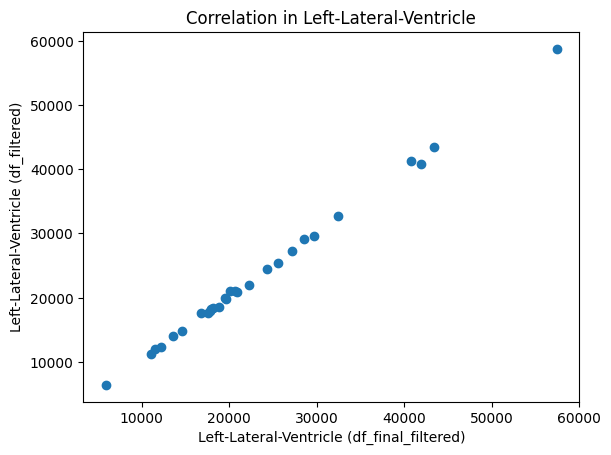


Correlation in CC_Central: 0.4527780994581096


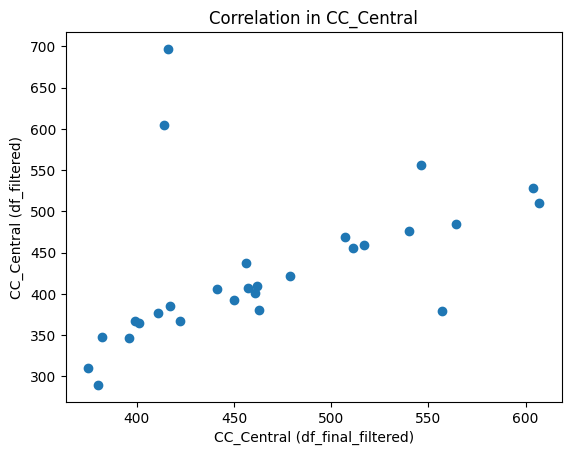


Correlation in Left-Pallidum: 0.7239496427416717


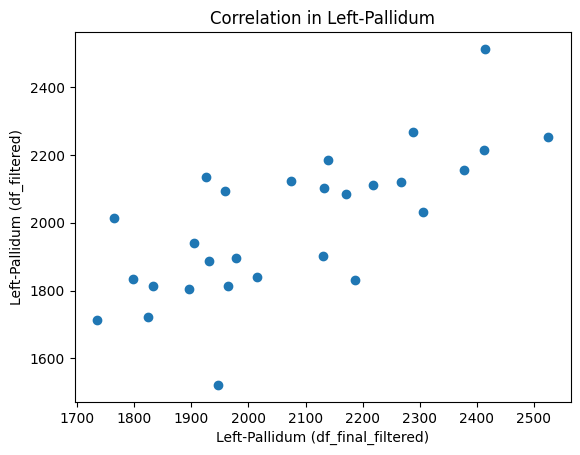


Correlation in CC_Mid_Anterior: 0.9389059636776672


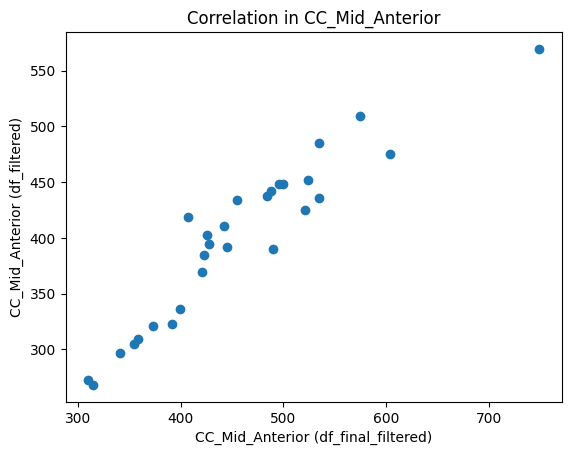


Correlation in Left-Putamen: 0.9081576568735045


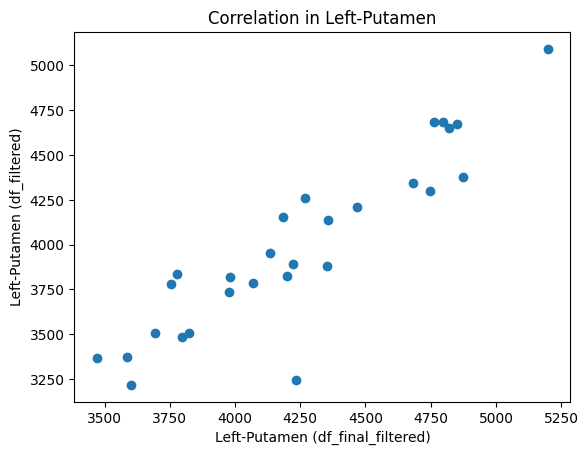


Correlation in CC_Mid_Posterior: 0.8984887584917538


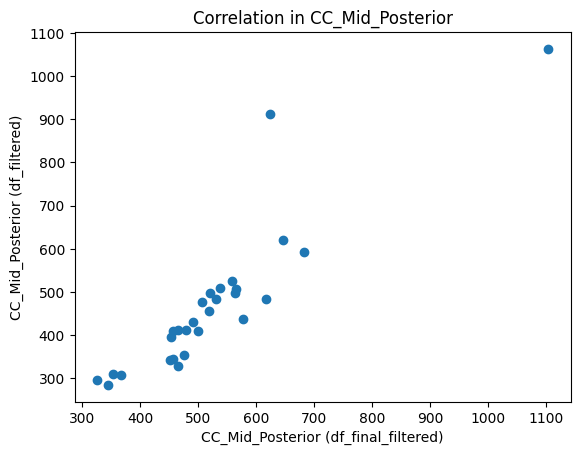


Correlation in Left-Thalamus: 0.9442792834475736


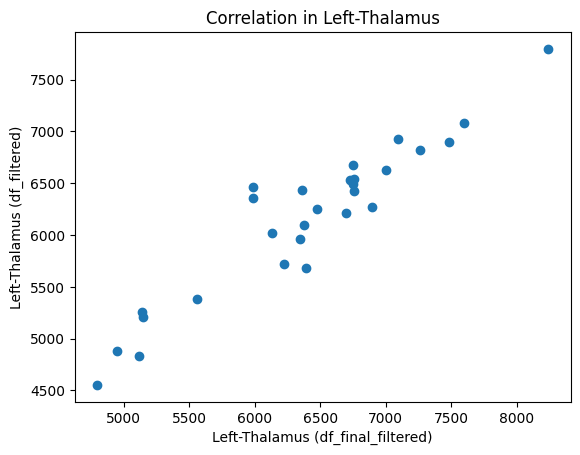


Correlation in Left-VentralDC: 0.9394799998759625


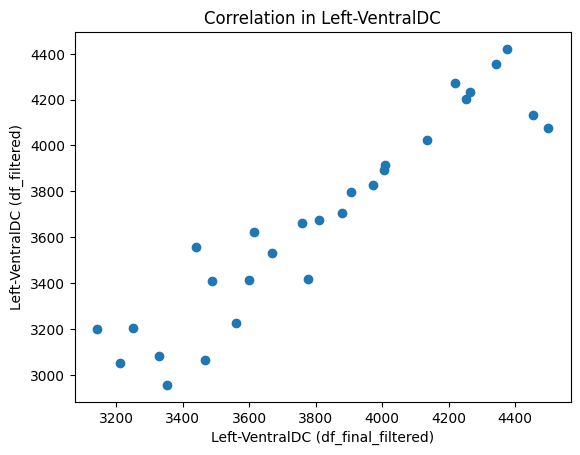


Correlation in Optic-Chiasm: 0.7190287287177439


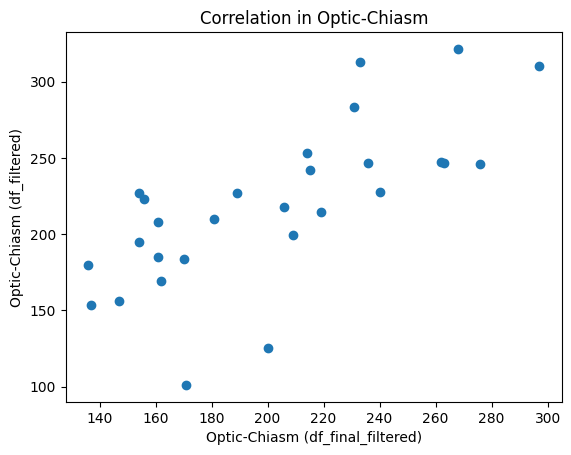


Correlation in CC_Posterior: 0.9118778291959246


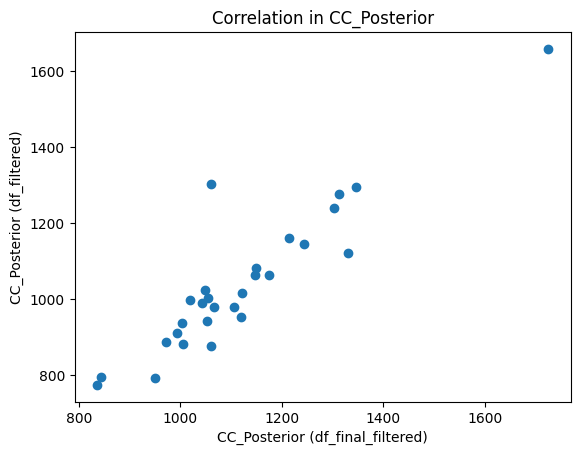


Correlation in Right-Accumbens-area: 0.8821641667982811


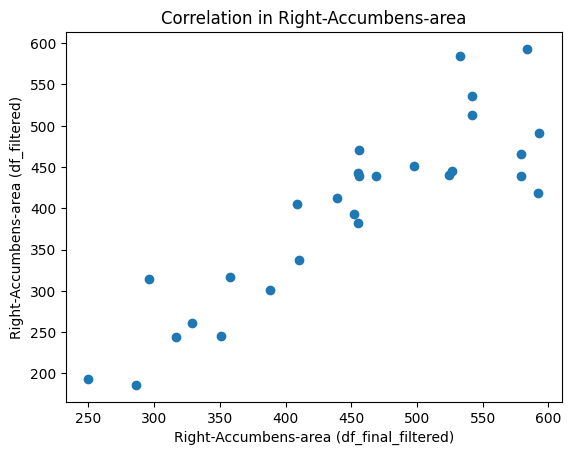


Correlation in Right-Amygdala: 0.9090263849985699


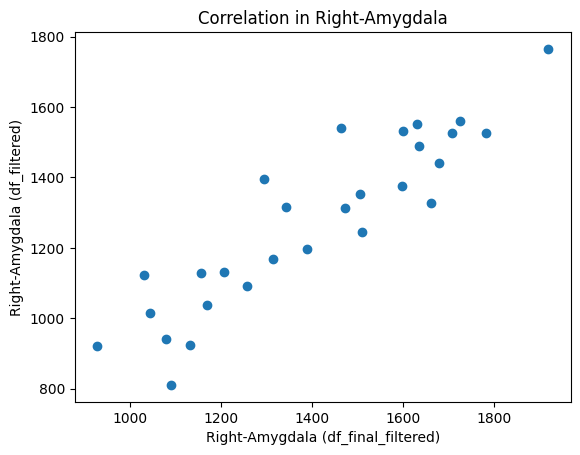


Correlation in Right-Caudate: 0.906907541739862


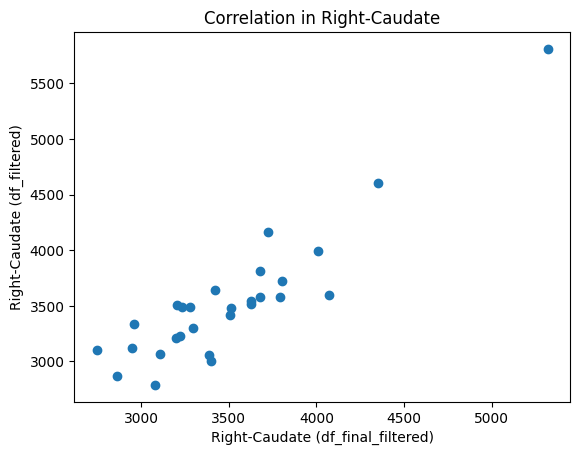


Correlation in Right-Cerebellum-Cortex: 0.9686123039035603


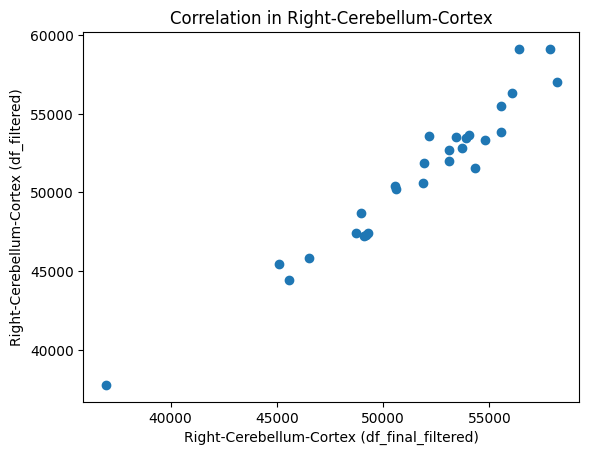


Correlation in Right-Cerebellum-White-Matter: 0.8654067514462307


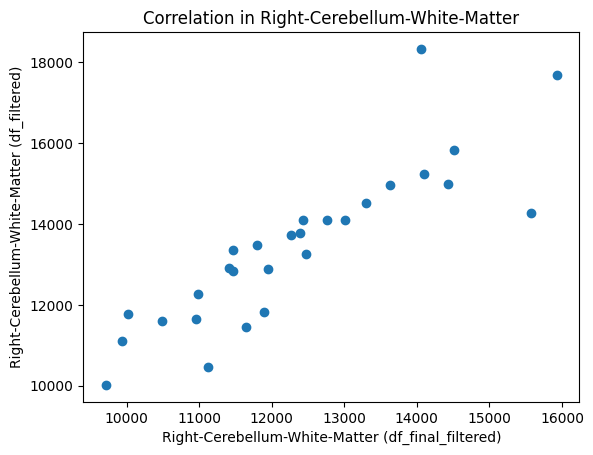


Correlation in CSF: 0.8854433678823938


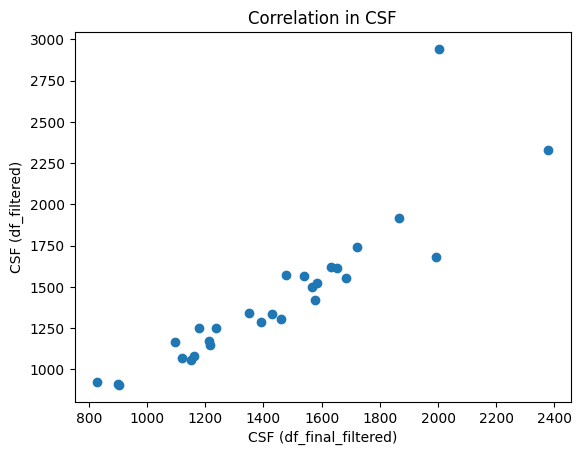


Correlation in Right-choroid-plexus: 0.8121617527197518


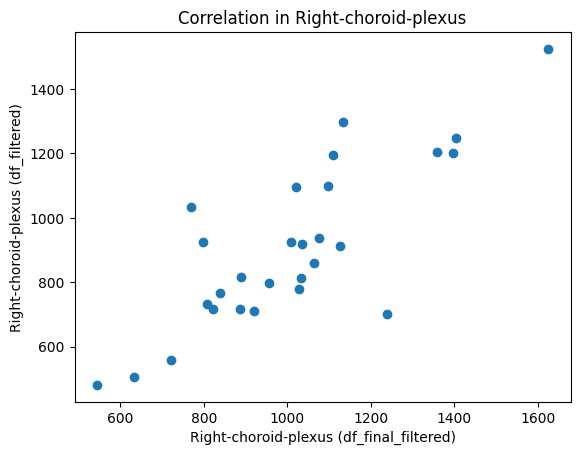


Correlation in Right-Hippocampus: 0.9863077731216824


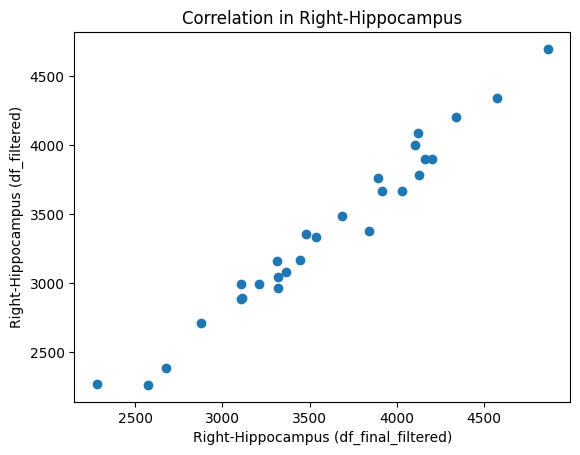


Correlation in Right-Inf-Lat-Vent: 0.995497755476844


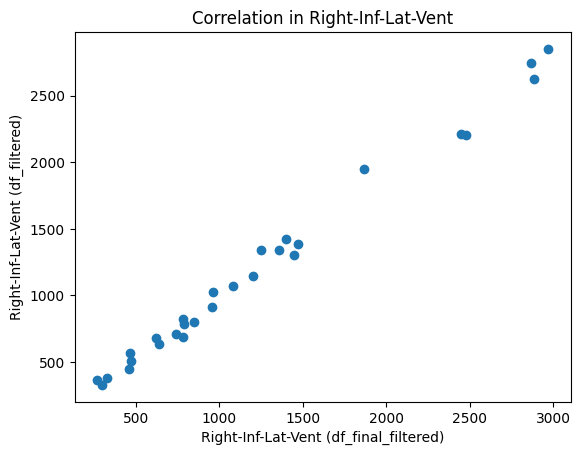


Correlation in Right-Lateral-Ventricle: 0.9993724704089395


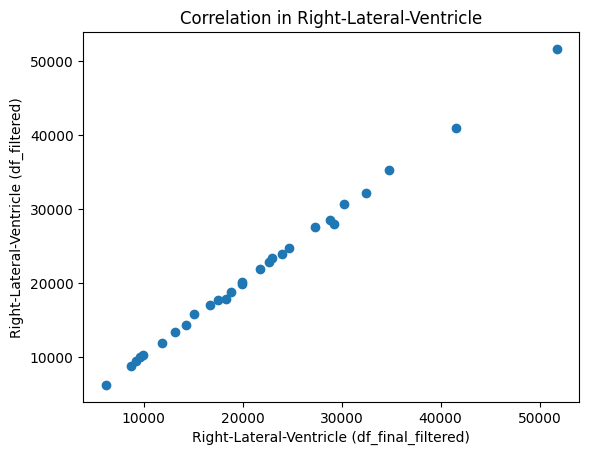


Correlation in 4th-Ventricle: 0.9678700598315646


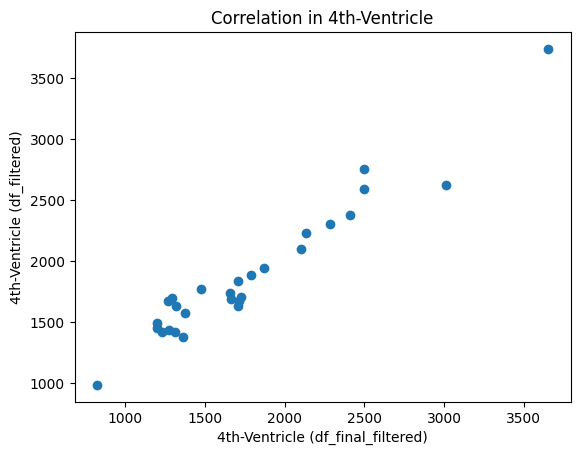


Table of correlations:
                        Structure  Correlation
0                  Right-Pallidum     0.500793
1                   Right-Putamen     0.921680
2             Left-Accumbens-area     0.811518
3                  Right-Thalamus     0.899342
4                 Right-VentralDC     0.957314
5                   3rd-Ventricle     0.973135
6              WM-hypointensities     0.992639
7                   Left-Amygdala     0.913432
8                    Left-Caudate     0.954051
9          Left-Cerebellum-Cortex     0.982760
10   Left-Cerebellum-White-Matter     0.824920
11                     Brain-Stem     0.945319
12            Left-choroid-plexus     0.846207
13               Left-Hippocampus     0.963856
14                    CC_Anterior     0.938955
15              Left-Inf-Lat-Vent     0.988421
16         Left-Lateral-Ventricle     0.999240
17                     CC_Central     0.452778
18                  Left-Pallidum     0.723950
19                CC_Mid_Anterior   

In [9]:
df_filtered = df_filtered.set_index("PTID")

common_columns = df_final_filtered.columns.intersection(df_filtered.columns)

df_final_filtered = df_final_filtered[common_columns]
df_filtered = df_filtered[common_columns]

df_final_filtered = df_final_filtered.loc[df_filtered.index]
df_filtered = df_filtered.loc[df_final_filtered.index]

correlation_results = []

for col in common_columns:
    df_col_final = df_final_filtered[col].astype(float)
    df_col_filtered = df_filtered[col].astype(float)

    if df_col_final.nunique() > 1 and df_col_filtered.nunique() > 1:
        correlation_value = df_col_final.corr(df_col_filtered)
    else:
        correlation_value = None

    correlation_results.append((col, correlation_value))

    print(f"\n=============================")
    print(f"Correlation in {col}: {correlation_value}")
    print("=============================")

    if correlation_value is not None:
        plt.scatter(df_col_final, df_col_filtered)
        plt.xlabel(f'{col} (df_final_filtered)')
        plt.ylabel(f'{col} (df_filtered)')
        plt.title(f'Correlation in {col}')
        plt.show()

df_correlation_results = pd.DataFrame(correlation_results, columns=['Structure', 'Correlation'])
print("\nTable of correlations:")
print(df_correlation_results)

In [10]:
df_correlation_results_sorted = df_correlation_results.sort_values(by="Correlation", ascending=False)

df_original_shape_VoxelVolume =  df_correlation_results_sorted

df_original_shape_VoxelVolume

,Structure,Correlation
35,Right-Lateral-Ventricle,0.999372
16,Left-Lateral-Ventricle,0.999240
34,Right-Inf-Lat-Vent,0.995498
6,WM-hypointensities,0.992639
15,Left-Inf-Lat-Vent,0.988421
33,Right-Hippocampus,0.986308
9,Left-Cerebellum-Cortex,0.982760
5,3rd-Ventricle,0.973135
29,Right-Cerebellum-Cortex,0.968612
36,4th-Ventricle,0.967870


###original_shape_MeshVolume

In [11]:
df_final = None

for file in csv_files:
    df = pd.read_csv(file, usecols=['StructName', 'original_shape_MeshVolume'])

    df.set_index('StructName', inplace=True)

    column_name = file.split('/')[-1].replace('_features.csv', '')
    df.columns = [column_name]

    if df_final is None:
        df_final = df
    else:
        df_final = df_final.join(df, how='outer')

df_final = df_final.T
df_final

StructName,3rd-Ventricle,4th-Ventricle,Brain-Stem,CC_Anterior,CC_Central,CC_Mid_Anterior,CC_Mid_Posterior,CC_Posterior,CSF,Left-Accumbens-area,...,ctx-rh-precentral,ctx-rh-precuneus,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-temporalpole,ctx-rh-transversetemporal
031_S_0830,1985.333333,1170.083333,19660.250000,972.041667,593.083333,588.583333,563.458333,1310.125000,1071.958333,274.041667,...,11159.291667,9136.416667,1166.666667,14170.291667,17590.375000,11621.416667,9393.541667,9189.791667,656.250000,688.416667
006_S_4363,1296.458333,1235.958333,19166.583333,1042.000000,504.000000,504.750000,503.958333,1329.166667,1092.291667,261.375000,...,10528.291667,6989.875000,1244.208333,12652.083333,15810.208333,11173.833333,9410.583333,8597.916667,2342.958333,670.958333
128_S_2130,3902.625000,2963.750000,23954.416667,644.583333,387.041667,359.791667,462.333333,825.583333,1955.916667,472.750000,...,13390.541667,9362.625000,2772.000000,14870.000000,22706.791667,11953.375000,8421.125000,9569.666667,2806.541667,705.083333
072_S_4462,2808.291667,1686.625000,21471.666667,904.625000,437.708333,410.333333,314.041667,1116.625000,1959.000000,367.291667,...,11364.583333,9302.541667,1487.583333,14417.666667,18086.333333,11672.375000,12048.250000,10231.916667,2285.458333,738.416667
137_S_0972,2361.375000,2244.583333,20575.916667,823.208333,497.875000,412.958333,522.166667,932.666667,1358.541667,237.291667,...,11098.708333,8588.125000,1628.833333,13741.208333,17560.666667,10720.125000,10972.250000,8778.000000,2517.041667,921.583333
099_S_4157,1828.000000,1287.125000,18055.750000,834.208333,370.166667,346.375000,445.291667,1104.416667,1322.041667,213.083333,...,9793.250000,6824.208333,1252.333333,10488.916667,16787.791667,8642.666667,9827.166667,8393.541667,1889.291667,798.583333
032_S_4823,2030.625000,1254.208333,16851.666667,660.458333,361.916667,302.666667,449.250000,1041.791667,1638.791667,288.875000,...,11009.291667,8533.208333,1922.625000,12440.458333,17501.916667,10395.625000,7223.083333,6747.000000,1322.916667,629.000000
130_S_2373,1122.875000,794.958333,17367.333333,764.958333,404.541667,408.750000,442.625000,821.291667,804.125000,267.458333,...,8584.833333,6045.541667,956.750000,9033.833333,14033.708333,7844.375000,7650.125000,6132.666667,2571.458333,536.583333
041_S_4720,1299.041667,1673.041667,22372.041667,1044.291667,448.416667,482.375000,548.458333,1027.916667,1199.583333,341.125000,...,14141.041667,8760.916667,1727.500000,13317.666667,20424.500000,11499.916667,11099.333333,11134.375000,2605.125000,737.833333
137_S_4623,1303.625000,1176.666667,20772.625000,923.833333,445.166667,485.750000,507.041667,956.250000,1395.125000,404.958333,...,12742.083333,10085.375000,1343.416667,12528.291667,19791.000000,13471.958333,11480.833333,10424.833333,2132.125000,967.583333


In [12]:
df_final_filtered = df_final[df_filtered.columns.intersection(df_final.columns)]

df_final_filtered

StructName,Right-Pallidum,Right-Putamen,Left-Accumbens-area,Right-Thalamus,Right-VentralDC,3rd-Ventricle,WM-hypointensities,Left-Amygdala,Left-Caudate,Left-Cerebellum-Cortex,...,Right-Amygdala,Right-Caudate,Right-Cerebellum-Cortex,Right-Cerebellum-White-Matter,CSF,Right-choroid-plexus,Right-Hippocampus,Right-Inf-Lat-Vent,Right-Lateral-Ventricle,4th-Ventricle
031_S_0830,1857.791667,3709.208333,274.041667,6180.708333,3507.000000,1985.333333,1545.750000,783.666667,3151.833333,51051.750000,...,1005.250000,3169.333333,50578.375000,11533.458333,1071.958333,949.208333,3049.291667,2422.083333,14985.416667,1170.083333
006_S_4363,1961.500000,4074.708333,261.375000,5610.166667,3347.125000,1296.458333,1683.083333,1156.541667,2923.708333,43727.416667,...,1451.875000,2920.458333,46441.083333,11382.875000,1092.291667,681.791667,3987.500000,270.500000,14195.916667,1235.958333
128_S_2130,2205.250000,4028.416667,472.750000,6271.916667,4174.833333,3902.625000,8621.625000,1336.375000,3596.625000,47928.791667,...,1636.458333,3670.125000,48925.250000,10861.750000,1955.916667,1104.625000,3143.958333,1206.625000,30155.208333,2963.750000
072_S_4462,1869.916667,4778.750000,367.291667,6754.833333,4218.083333,2808.291667,3444.708333,1334.750000,3280.625000,57058.958333,...,1573.666667,3465.125000,58043.541667,13248.791667,1959.000000,674.958333,3867.708333,1361.125000,32401.666667,1686.625000
137_S_0972,1835.458333,4180.583333,237.291667,6872.625000,3674.000000,2361.375000,3522.958333,863.500000,3379.875000,50551.875000,...,1576.833333,3471.500000,51770.708333,9941.583333,1358.541667,939.000000,4162.166667,755.250000,13108.166667,2244.583333
099_S_4157,1804.791667,3946.791667,213.083333,4837.291667,3063.291667,1828.000000,7051.166667,1201.208333,3170.833333,47859.291667,...,1060.000000,3188.500000,49050.250000,11819.791667,1322.041667,982.333333,2635.125000,1325.625000,16569.583333,1287.125000
032_S_4823,2110.916667,3056.500000,288.875000,4672.791667,3341.541667,2030.625000,3812.958333,963.375000,2801.583333,51154.458333,...,1111.083333,2826.041667,53396.958333,11729.333333,1638.791667,1349.958333,2823.000000,2844.416667,34696.125000,1254.208333
130_S_2373,1636.166667,3586.416667,267.458333,4837.333333,3353.416667,1122.875000,1418.583333,881.791667,2743.500000,37912.583333,...,1068.833333,3048.291667,36995.625000,10384.083333,804.125000,852.000000,2538.125000,749.958333,9826.958333,794.958333
041_S_4720,2138.416667,5300.000000,341.125000,7127.583333,4028.750000,1299.041667,8751.958333,1757.708333,3329.250000,47314.375000,...,1610.208333,3259.375000,49190.583333,12155.750000,1199.583333,1254.416667,3636.458333,428.000000,18239.541667,1673.041667
137_S_4623,2120.708333,4948.458333,404.958333,7069.791667,4015.750000,1303.625000,1229.833333,1379.916667,3088.166667,55527.333333,...,1484.666667,3177.375000,54226.583333,13979.875000,1395.125000,542.625000,4285.791667,293.458333,9125.458333,1176.666667



Correlation in Right-Pallidum: 0.49860046896236665


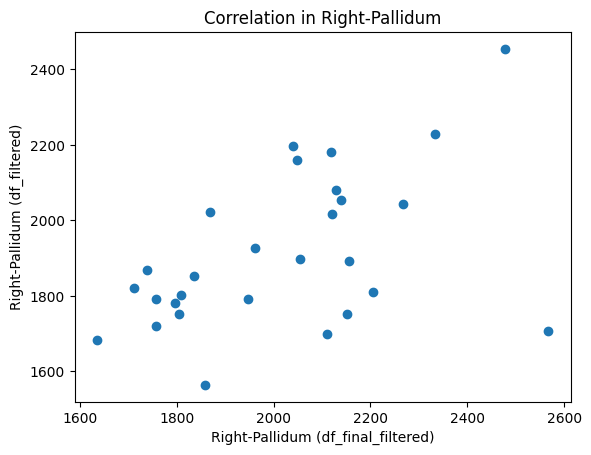


Correlation in Right-Putamen: 0.9212453408475644


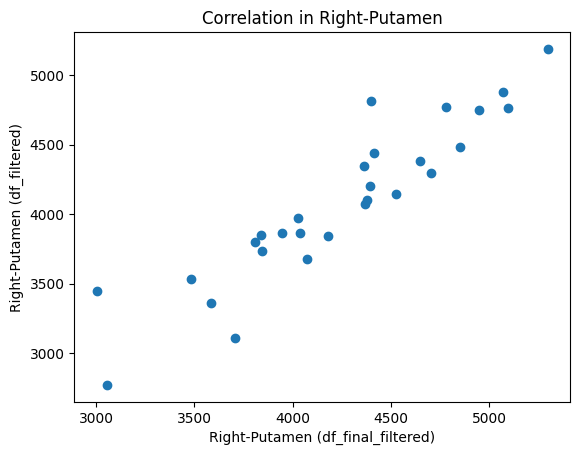


Correlation in Left-Accumbens-area: 0.8132865842479696


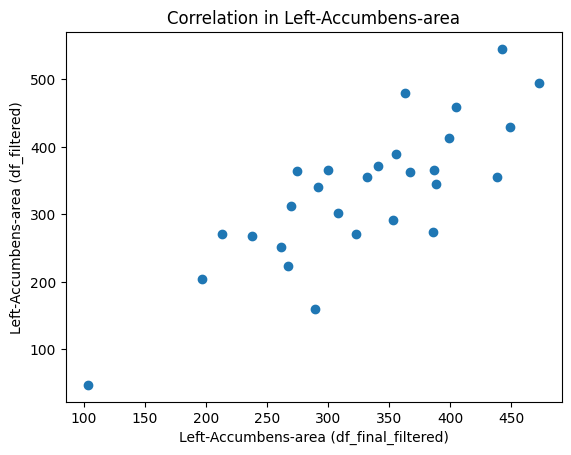


Correlation in Right-Thalamus: 0.8989528279278768


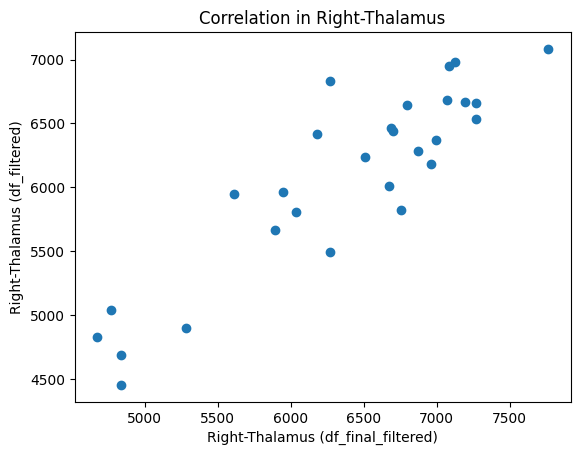


Correlation in Right-VentralDC: 0.9565216063805789


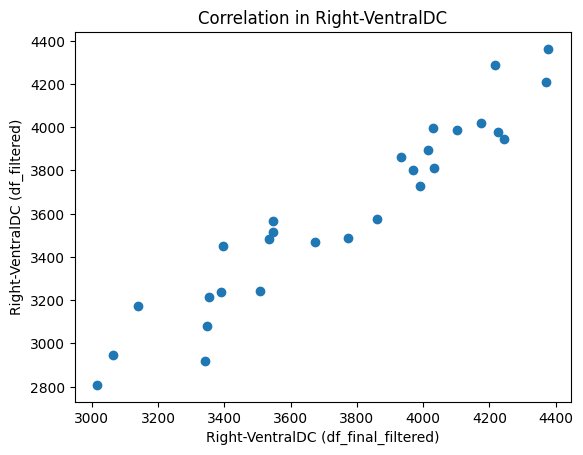


Correlation in 3rd-Ventricle: 0.9730163065714207


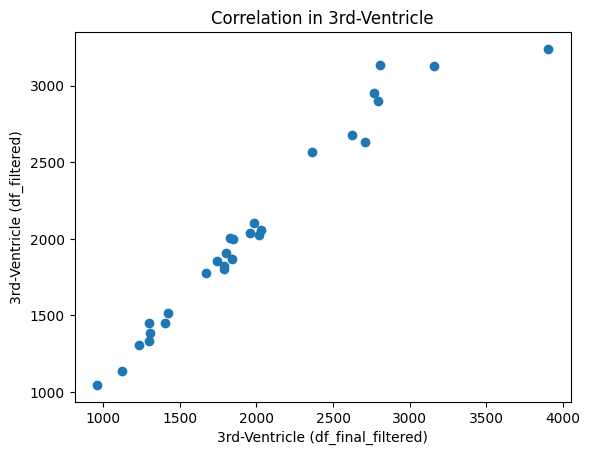


Correlation in WM-hypointensities: 0.9926274970631


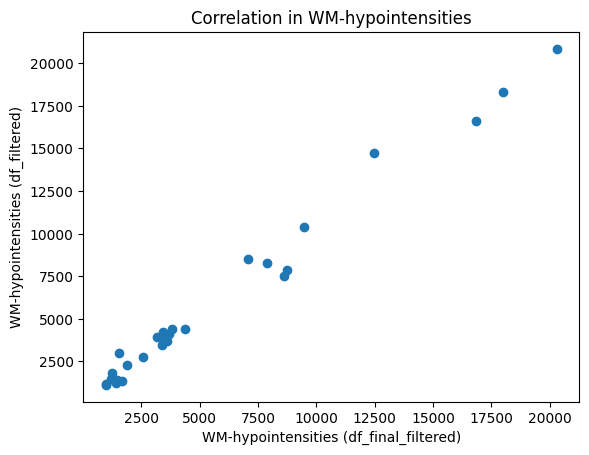


Correlation in Left-Amygdala: 0.913578220389046


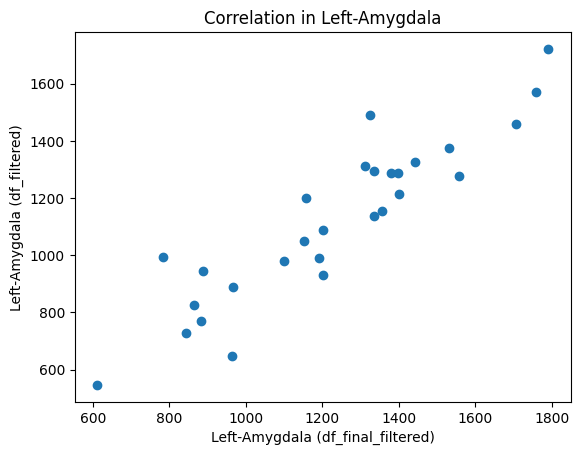


Correlation in Left-Caudate: 0.953832330046989


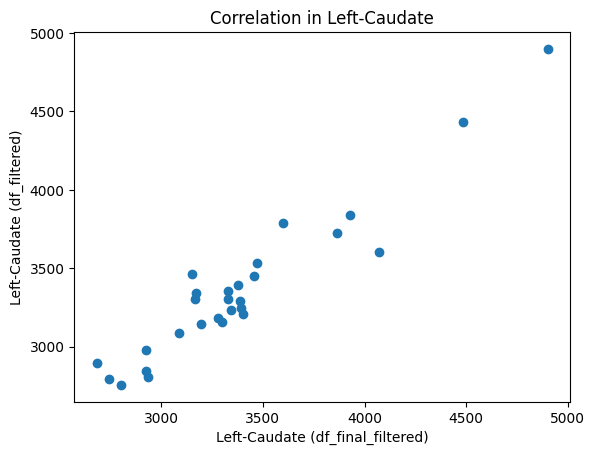


Correlation in Left-Cerebellum-Cortex: 0.9834353881552581


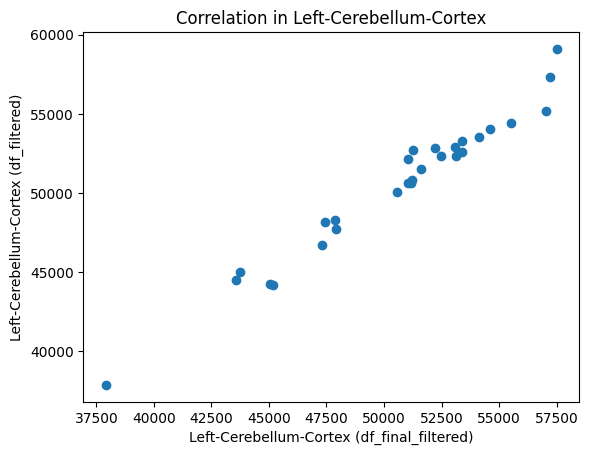


Correlation in Left-Cerebellum-White-Matter: 0.8239580421803995


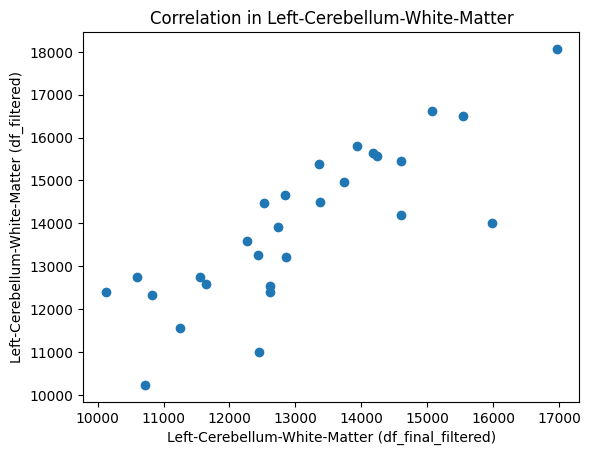


Correlation in Brain-Stem: 0.9455247582564195


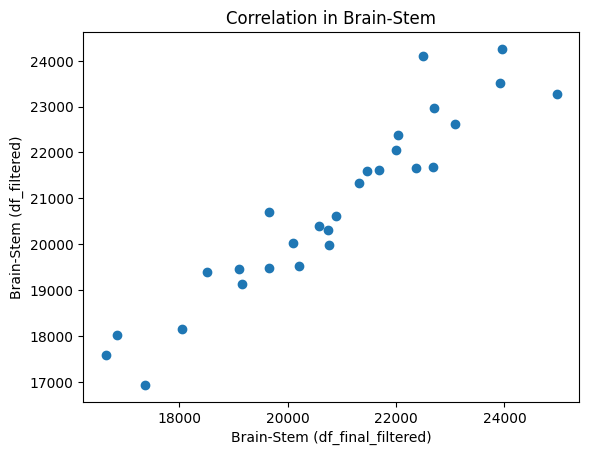


Correlation in Left-choroid-plexus: 0.8325741947098659


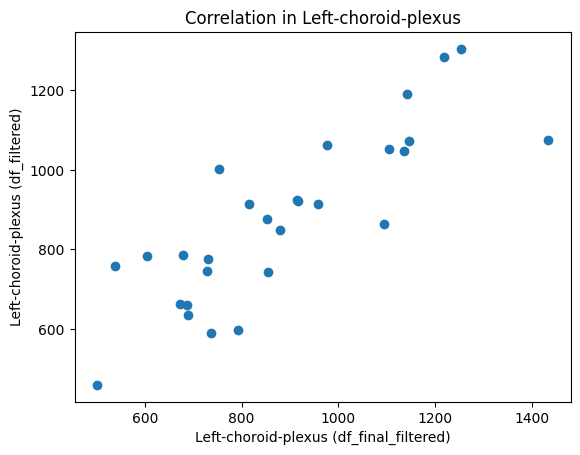


Correlation in Left-Hippocampus: 0.9635435989107908


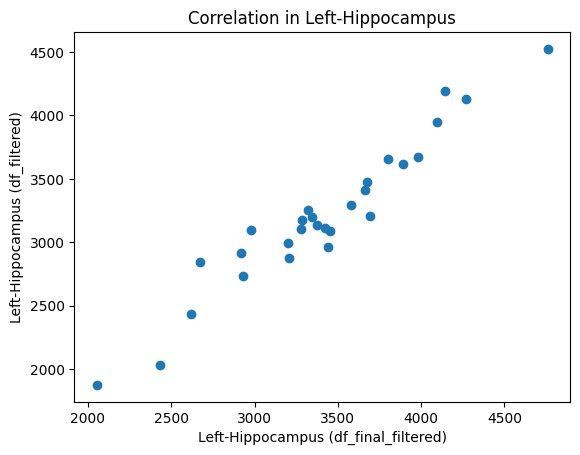


Correlation in CC_Anterior: 0.9386668160999773


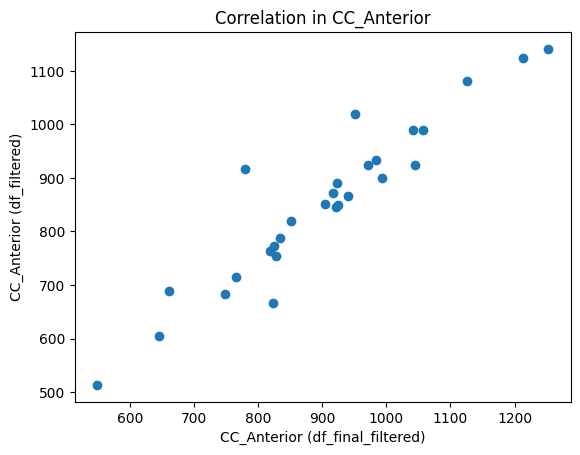


Correlation in Left-Inf-Lat-Vent: 0.9885936310535016


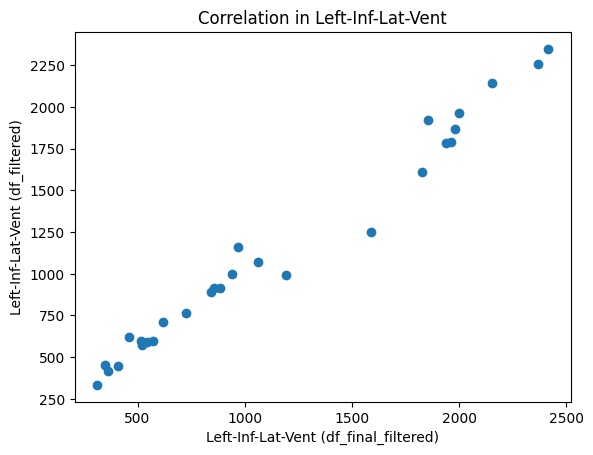


Correlation in Left-Lateral-Ventricle: 0.9992450882294582


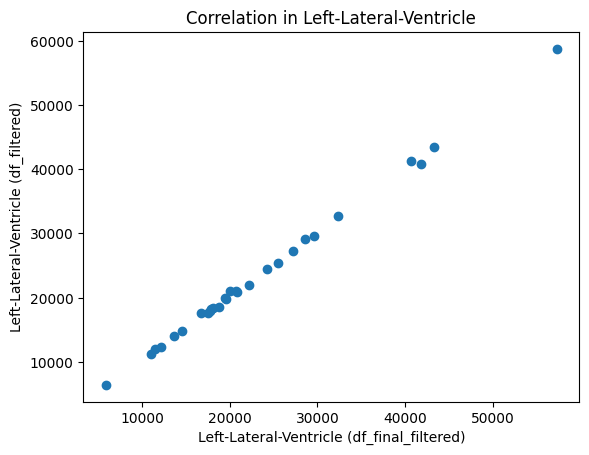


Correlation in CC_Central: 0.45238269084945076


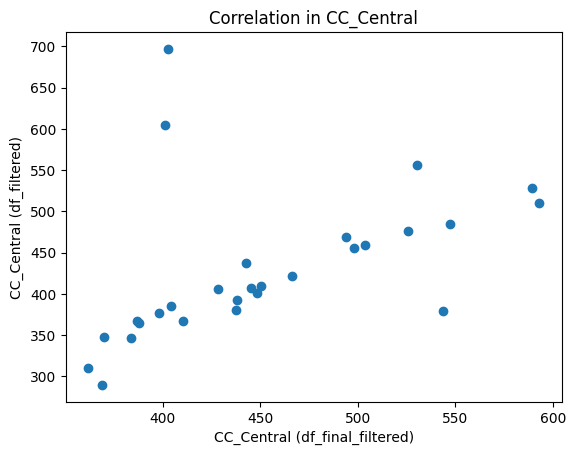


Correlation in Left-Pallidum: 0.7217938980345092


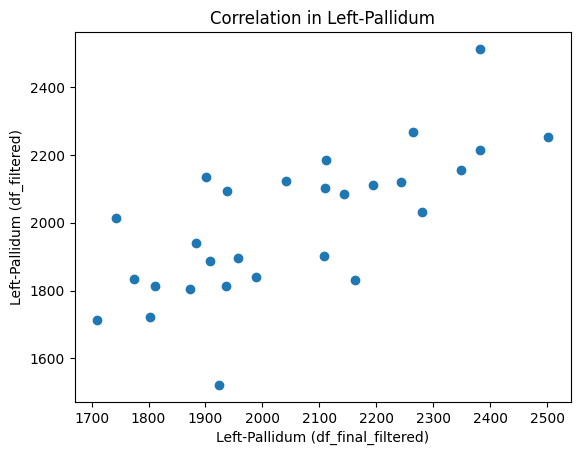


Correlation in CC_Mid_Anterior: 0.9408357453262958


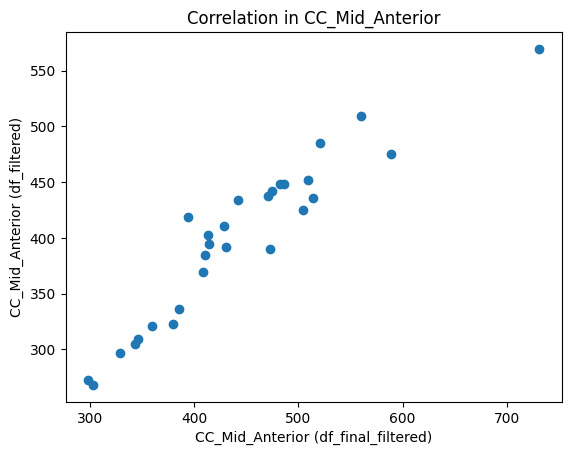


Correlation in Left-Putamen: 0.9059819621447046


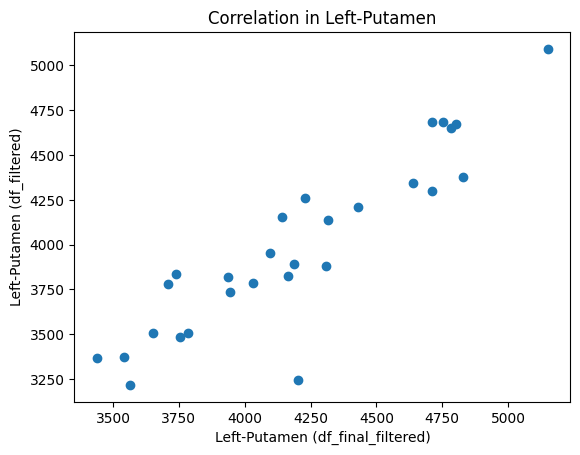


Correlation in CC_Mid_Posterior: 0.9000130994379537


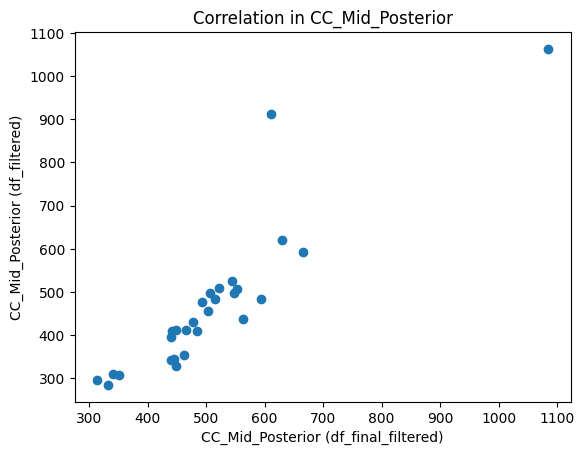


Correlation in Left-Thalamus: 0.9439591670820131


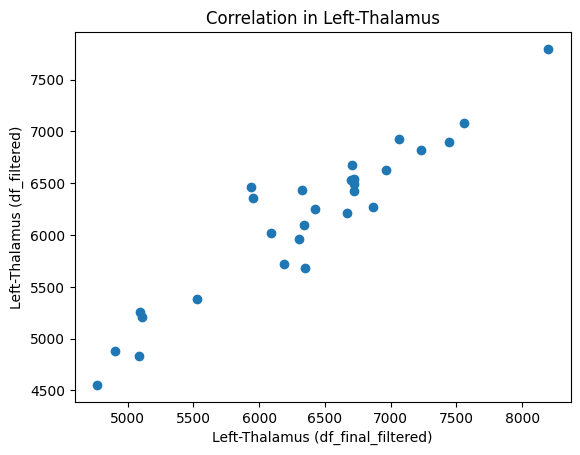


Correlation in Left-VentralDC: 0.9386180310533724


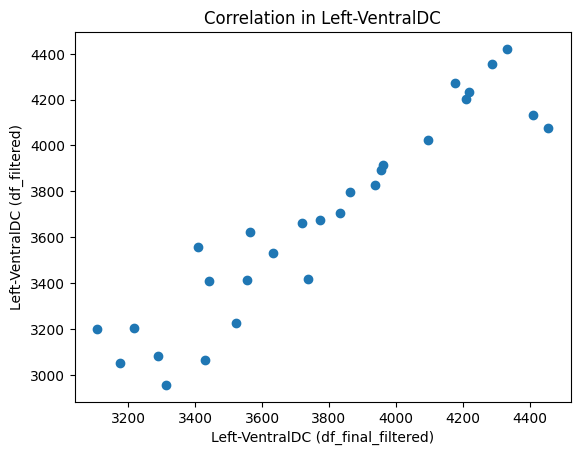


Correlation in Optic-Chiasm: 0.7080284826226638


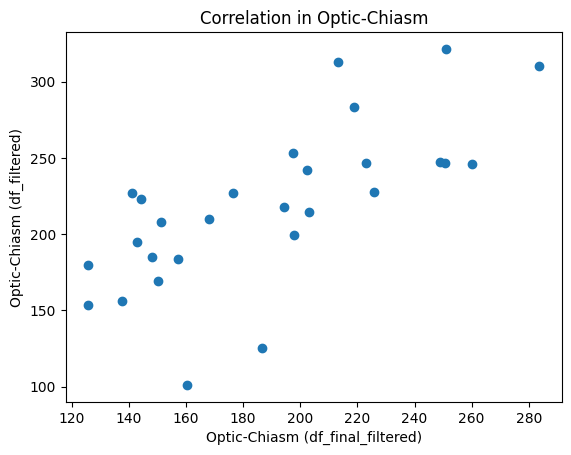


Correlation in CC_Posterior: 0.9081702213755206


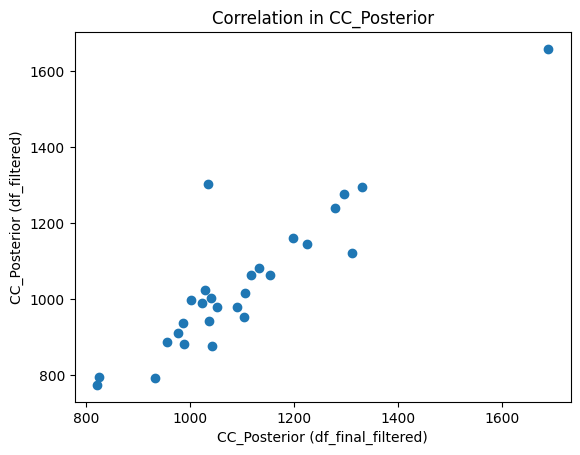


Correlation in Right-Accumbens-area: 0.8793998197662897


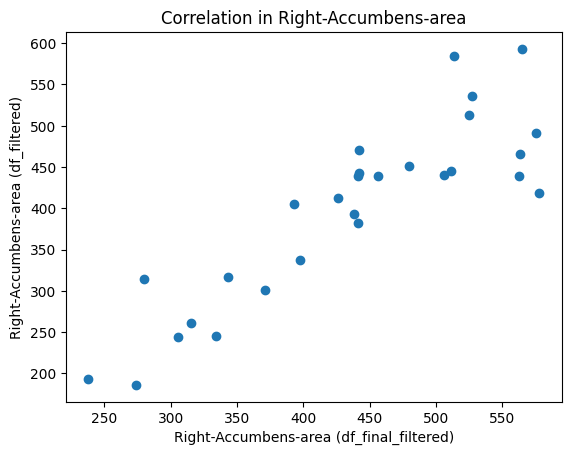


Correlation in Right-Amygdala: 0.9075804632343731


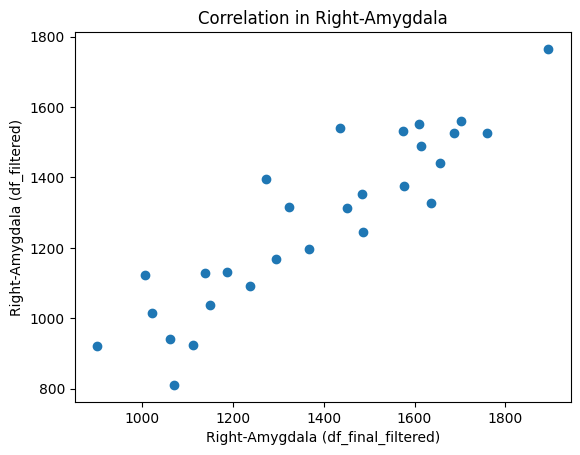


Correlation in Right-Caudate: 0.9061618552158994


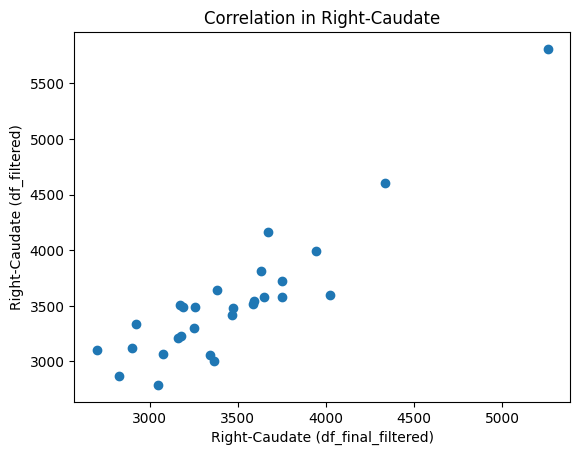


Correlation in Right-Cerebellum-Cortex: 0.9691059344078998


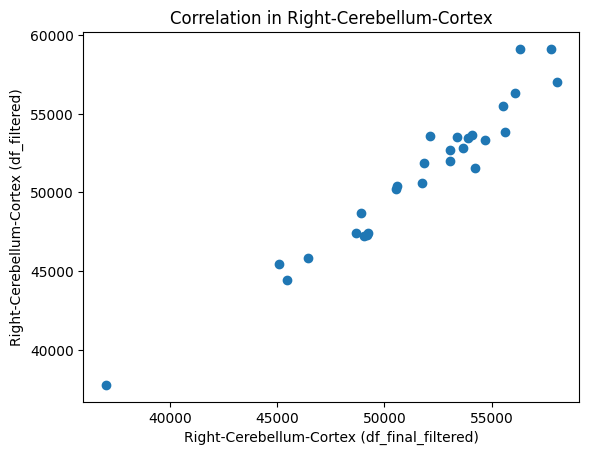


Correlation in Right-Cerebellum-White-Matter: 0.865225895677481


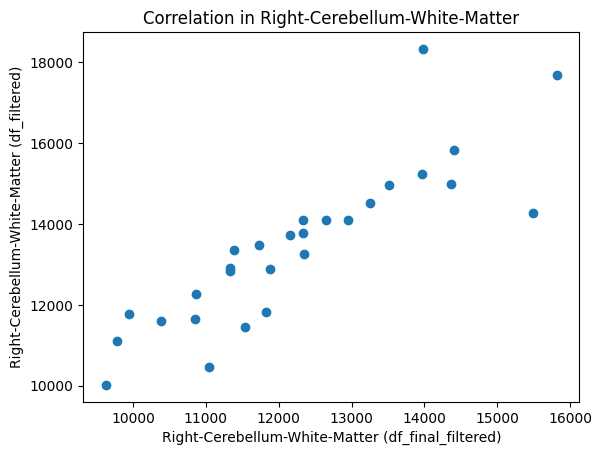


Correlation in CSF: 0.8821001060919699


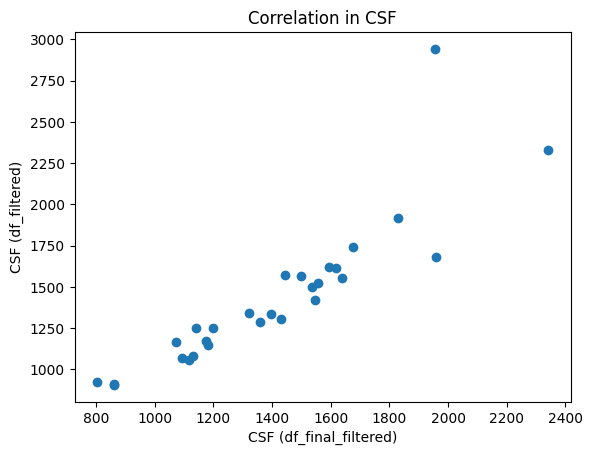


Correlation in Right-choroid-plexus: 0.812448048352035


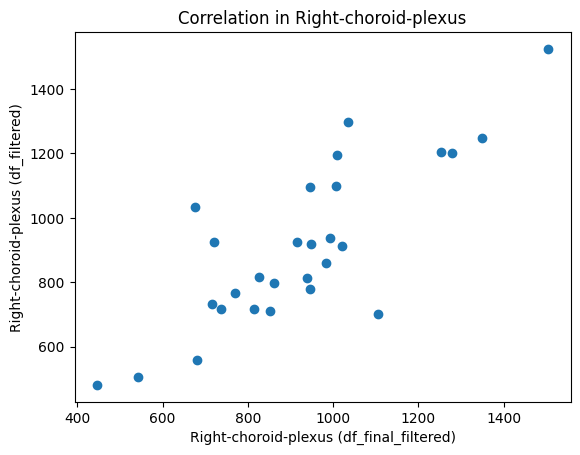


Correlation in Right-Hippocampus: 0.986093273466898


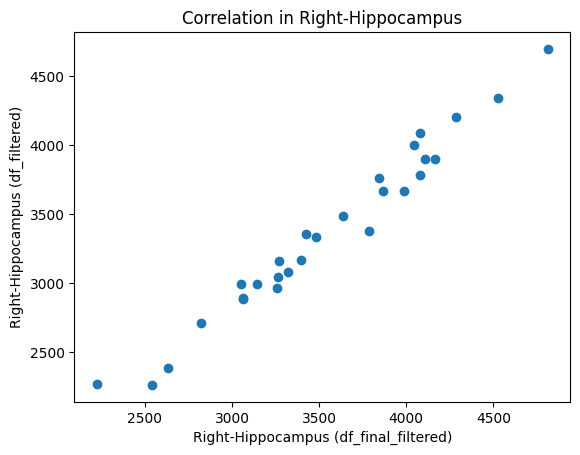


Correlation in Right-Inf-Lat-Vent: 0.9954342100629658


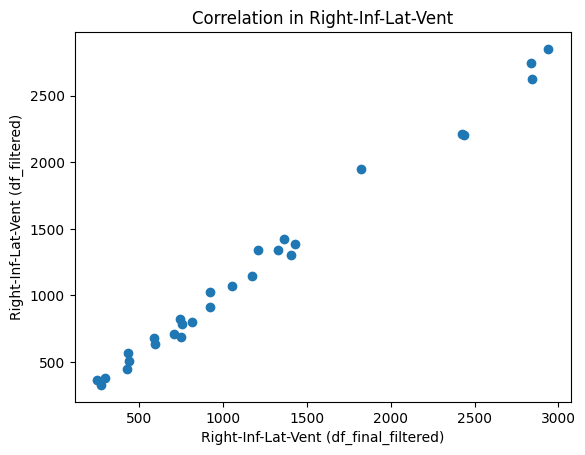


Correlation in Right-Lateral-Ventricle: 0.9993767735778004


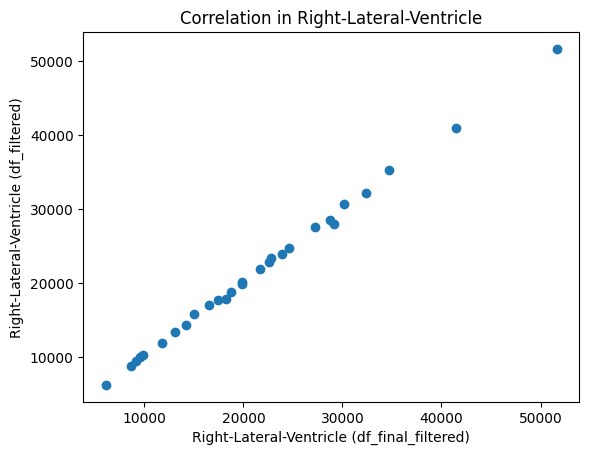


Correlation in 4th-Ventricle: 0.9681643074027863


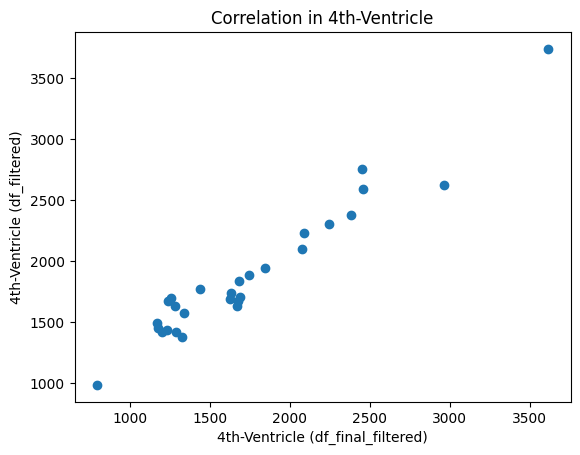


Table of correlations:
                        Structure  Correlation
0                  Right-Pallidum     0.498600
1                   Right-Putamen     0.921245
2             Left-Accumbens-area     0.813287
3                  Right-Thalamus     0.898953
4                 Right-VentralDC     0.956522
5                   3rd-Ventricle     0.973016
6              WM-hypointensities     0.992627
7                   Left-Amygdala     0.913578
8                    Left-Caudate     0.953832
9          Left-Cerebellum-Cortex     0.983435
10   Left-Cerebellum-White-Matter     0.823958
11                     Brain-Stem     0.945525
12            Left-choroid-plexus     0.832574
13               Left-Hippocampus     0.963544
14                    CC_Anterior     0.938667
15              Left-Inf-Lat-Vent     0.988594
16         Left-Lateral-Ventricle     0.999245
17                     CC_Central     0.452383
18                  Left-Pallidum     0.721794
19                CC_Mid_Anterior   

In [13]:
common_columns = df_final_filtered.columns.intersection(df_filtered.columns)

df_final_filtered = df_final_filtered[common_columns]
df_filtered = df_filtered[common_columns]

df_final_filtered = df_final_filtered.loc[df_filtered.index]
df_filtered = df_filtered.loc[df_final_filtered.index]

correlation_results = []

for col in common_columns:
    df_col_final = df_final_filtered[col].astype(float)
    df_col_filtered = df_filtered[col].astype(float)

    if df_col_final.nunique() > 1 and df_col_filtered.nunique() > 1:
        correlation_value = df_col_final.corr(df_col_filtered)
    else:
        correlation_value = None

    correlation_results.append((col, correlation_value))

    print(f"\n=============================")
    print(f"Correlation in {col}: {correlation_value}")
    print("=============================")

    # Graficar la correlación si es válida
    if correlation_value is not None:
        plt.scatter(df_col_final, df_col_filtered)
        plt.xlabel(f'{col} (df_final_filtered)')
        plt.ylabel(f'{col} (df_filtered)')
        plt.title(f'Correlation in {col}')
        plt.show()

# Convertir resultados en un DataFrame y mostrar
df_correlation_results = pd.DataFrame(correlation_results, columns=['Structure', 'Correlation'])
print("\nTable of correlations:")
print(df_correlation_results)

In [14]:
df_correlation_results_sorted = df_correlation_results.sort_values(by="Correlation", ascending=False)

df_original_shape_MeshVolume = df_correlation_results_sorted

df_original_shape_MeshVolume

,Structure,Correlation
35,Right-Lateral-Ventricle,0.999377
16,Left-Lateral-Ventricle,0.999245
34,Right-Inf-Lat-Vent,0.995434
6,WM-hypointensities,0.992627
15,Left-Inf-Lat-Vent,0.988594
33,Right-Hippocampus,0.986093
9,Left-Cerebellum-Cortex,0.983435
5,3rd-Ventricle,0.973016
29,Right-Cerebellum-Cortex,0.969106
36,4th-Ventricle,0.968164


In [15]:
df_together = df_original_shape_VoxelVolume.merge(
    df_original_shape_MeshVolume[['Structure', 'Correlation']],
    on='Structure',
    how='left',
    suffixes=('_VoxelVolume', '_MeshVolume')
)

df_together.to_csv("SV_Volume.csv", index=False)

df_together

,Structure,Correlation_VoxelVolume,Correlation_MeshVolume
0,Right-Lateral-Ventricle,0.999372,0.999377
1,Left-Lateral-Ventricle,0.999240,0.999245
2,Right-Inf-Lat-Vent,0.995498,0.995434
3,WM-hypointensities,0.992639,0.992627
4,Left-Inf-Lat-Vent,0.988421,0.988594
5,Right-Hippocampus,0.986308,0.986093
6,Left-Cerebellum-Cortex,0.982760,0.983435
7,3rd-Ventricle,0.973135,0.973016
8,Right-Cerebellum-Cortex,0.968612,0.969106
9,4th-Ventricle,0.967870,0.968164
